# General Overview - Machine Learning

For this binary classification problem, we are using Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and Gradient Boosting Classifier, Gaussian Naive Bayes. To assess the accuracy, we look at the accuracy scores and classification reports.

### Import and Load

In [1]:
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
# rcParams['figure.figsize'] = 4,4
# plt.style.use('fivethirtyeight')

from collections import Counter

# for modeling 
import sklearn
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_precision_recall_curve, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [2]:
data = pd.read_csv('diabetic_data_cleaned_dummy.csv', index_col=0).sample(5000)
df = data.copy()

df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,race_Hispanic,...,rosiglitazone_No,rosiglitazone_Up,acarbose_Steady,acarbose_Up,insulin_No,insulin_Steady,insulin_Up,change_No,diabetesMed_Yes,readmitted_YES
59098,4,58,0,11,0,0,9,0,0,0,...,1,0,0,0,0,1,0,1,1,0
42885,4,26,2,18,0,0,9,0,0,0,...,1,0,0,0,1,0,0,0,1,1
30456,9,68,0,9,0,0,9,0,1,0,...,1,0,0,0,0,1,0,1,1,0
20447,1,41,1,4,0,0,5,0,0,0,...,1,0,0,0,1,0,0,1,1,0
18018,5,65,0,11,0,0,9,0,1,0,...,1,0,0,0,0,1,0,1,1,0


### Lazy Predict with 5000 samples

In [3]:
from lazypredict.Supervised import LazyClassifier

df_5000 = df.sample(5000,random_state=42)
y = df_5000['readmitted_YES']
X = df_5000.drop('readmitted_YES', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state =42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:15<00:00,  1.83it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.58,0.58,0.58,0.58,0.02
BernoulliNB,0.61,0.56,0.56,0.58,0.03
LGBMClassifier,0.61,0.55,0.55,0.58,0.09
RandomForestClassifier,0.62,0.55,0.55,0.57,0.54
ExtraTreesClassifier,0.60,0.55,0.55,0.58,0.62
RidgeClassifierCV,0.62,0.55,0.55,0.56,0.06
RidgeClassifier,0.62,0.55,0.55,0.56,0.03
LinearSVC,0.62,0.54,0.54,0.56,1.10
LogisticRegression,0.62,0.54,0.54,0.56,0.05


### Split Data

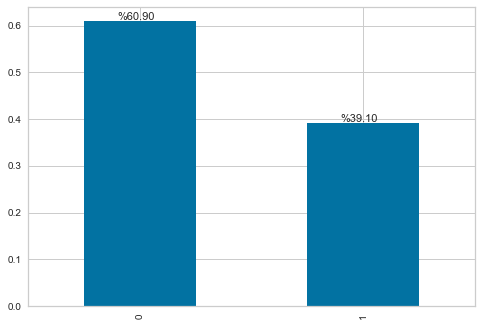

In [4]:
ax = df['readmitted_YES'].value_counts(normalize=True).plot.bar()
def labels(ax):
    for p in ax.patches:
        ax.annotate(f"%{p.get_height()*100:.2f}", (p.get_x() + 0.15, p.get_height() * 1.005),size=11)
labels(ax)

In [5]:
# separating the dependent and independent data
X = df.drop('readmitted_YES', axis=1)
y = df['readmitted_YES']

# the function train_test_split creates random data samples (default: 75-25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# getting the shapes
print(f"""shape of X_train: {X_train.shape}
shape of X_test\t: {X_test.shape}
shape of y_train: {y_train.shape}
shape of y_test\t: {y_test.shape}""")

shape of X_train: (3750, 54)
shape of X_test	: (1250, 54)
shape of y_train: (3750,)
shape of y_test	: (1250,)


### Data Scaling

In [6]:
# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Iteration 1: (Unbalanced data)
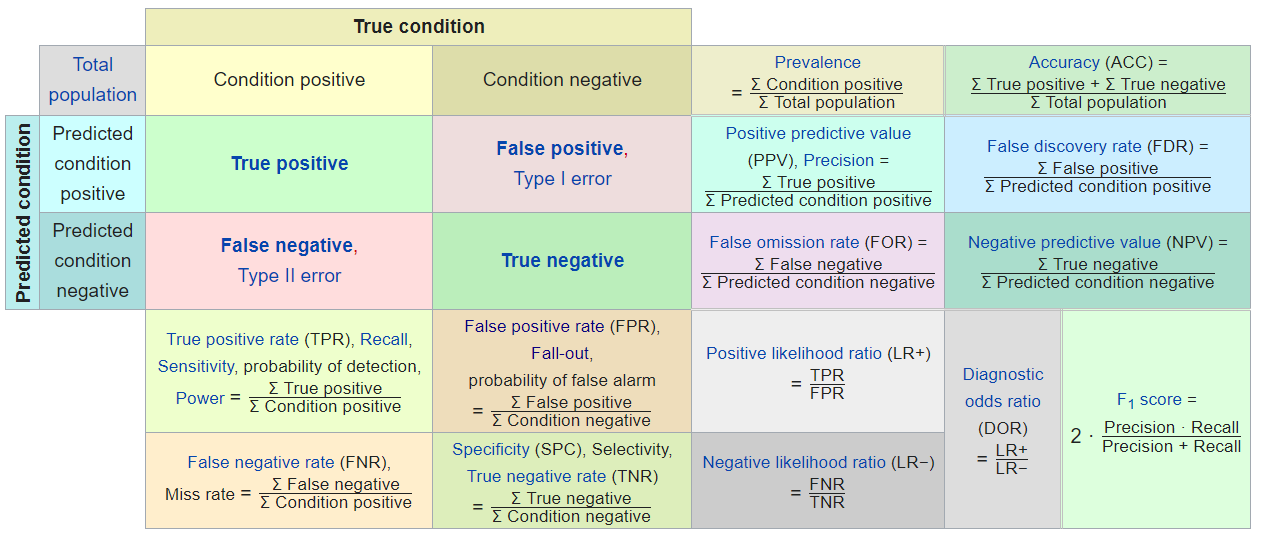

In [7]:
cv_acc_train = {}
cv_acc_test = {}
cv_TPR = {}
cv_FPR = {}
cv_AUC = {}

In [8]:
def plot_result(model, name:str):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation based on a 10-fold cross-validation
    scoring = ['balanced_accuracy', 'recall_macro']
    scores_train = cross_val_score(model, X_train, y_train, cv=10, scoring = 'balanced_accuracy')
    scores_test = cross_val_score(model, X_test, y_test, cv=10, scoring = 'balanced_accuracy')  
    cv_acc_train[name] = round(scores_train.mean(), 4)*100  # balanced accuracy
    cv_acc_test[name] = round(scores_test.mean(), 4)*100  # balanced accuracy
    cv_TPR[name] = (confusion_matrix(y_test, y_pred)[1][1]/confusion_matrix(y_test, y_pred)[1].sum())*100  # recall (Max)
    cv_FPR[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())*100  # fallout (Min)
    
    # accuracy scores
    print('Average Balanced Accuracy (CV=10), Test Set:', scores_test.mean())  
    print('Average Balanced Accuracy (CV=10), Training Set: ', scores_train.mean())

    # print classification report
    print(classification_report(y_test, y_pred, zero_division=0))

    # Plot Confusion Matrix
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

### 1-Decision tree

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix

Average Balanced Accuracy (CV=10), Test Set: 0.5181194666861961
Average Balanced Accuracy (CV=10), Training Set:  0.5270854171315624
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       761
           1       0.43      0.43      0.43       489

    accuracy                           0.55      1250
   macro avg       0.53      0.53      0.53      1250
weighted avg       0.55      0.55      0.55      1250



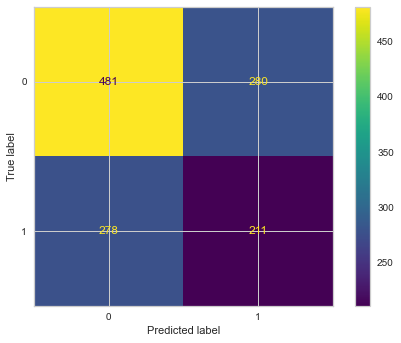

In [10]:
dtc = DecisionTreeClassifier()
plot_result(dtc, "dtc")

In [11]:
# plot tree
# plt.figure(figsize=(16,6))
# plot_tree(dtc, filled = True, class_names=["-1", "1"], feature_names=X.columns, fontsize=11);

In [12]:
cv_acc_train, cv_acc_test, cv_TPR, cv_FPR

({'dtc': 52.71},
 {'dtc': 51.81},
 {'dtc': 43.149284253578735},
 {'dtc': 36.793692509855454})

### 2-Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

Average Balanced Accuracy (CV=10), Test Set: 0.5377652735735443
Average Balanced Accuracy (CV=10), Training Set:  0.5440190402107012
              precision    recall  f1-score   support

           0       0.62      0.86      0.72       761
           1       0.47      0.19      0.27       489

    accuracy                           0.60      1250
   macro avg       0.55      0.53      0.50      1250
weighted avg       0.57      0.60      0.55      1250



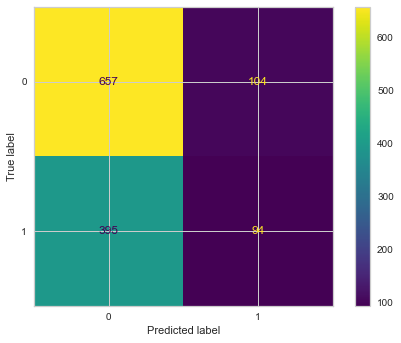

In [14]:
lr = LogisticRegression()
plot_result(lr, "lr")

### 3-SVC

Average Balanced Accuracy (CV=10), Test Set: 0.5076189865898513
Average Balanced Accuracy (CV=10), Training Set:  0.5384200511983347
              precision    recall  f1-score   support

           0       0.63      0.90      0.74       761
           1       0.51      0.16      0.24       489

    accuracy                           0.61      1250
   macro avg       0.57      0.53      0.49      1250
weighted avg       0.58      0.61      0.55      1250



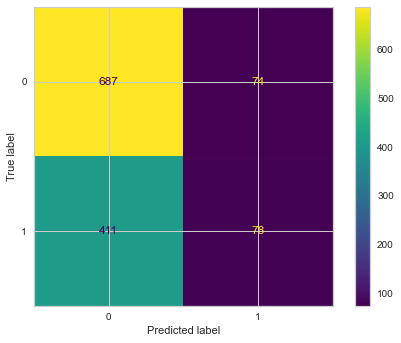

In [15]:
svc = SVC(probability=True)  # default values
plot_result(svc, "svc")

### 4-NearestCentroid

In [16]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix

Average Balanced Accuracy (CV=10), Test Set: 0.5427094522019335
Average Balanced Accuracy (CV=10), Training Set:  0.5678586972391713
              precision    recall  f1-score   support

           0       0.67      0.55      0.60       761
           1       0.45      0.58      0.51       489

    accuracy                           0.56      1250
   macro avg       0.56      0.57      0.56      1250
weighted avg       0.59      0.56      0.57      1250



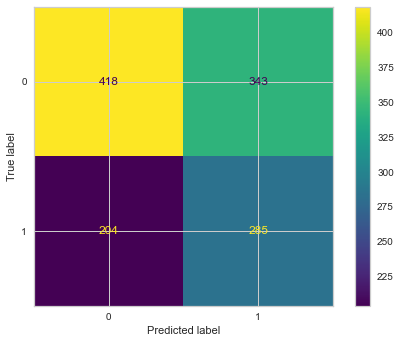

In [17]:
nc = NearestCentroid()
plot_result(nc, "nc")

### 5-Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

Average Balanced Accuracy (CV=10), Test Set: 0.5080991846499365
Average Balanced Accuracy (CV=10), Training Set:  0.5337844692915688
              precision    recall  f1-score   support

           0       0.63      0.83      0.72       761
           1       0.49      0.26      0.34       489

    accuracy                           0.60      1250
   macro avg       0.56      0.54      0.53      1250
weighted avg       0.58      0.60      0.57      1250



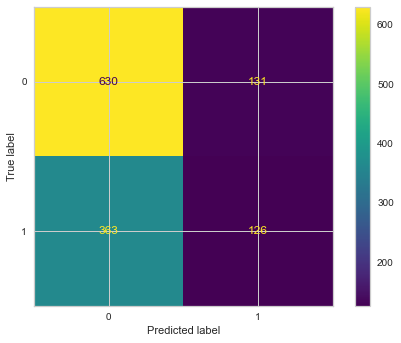

In [19]:
rfc = RandomForestClassifier()
plot_result(rfc, "rfc")

In [20]:
def plot_feature_importances(model):
    feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)[:10]

    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.title("Feature Importance")
    plt.show()

    print(f"Top 10 Feature Importance for {str(model).split('(')[0]}\n\n",feature_imp[:10],sep='')

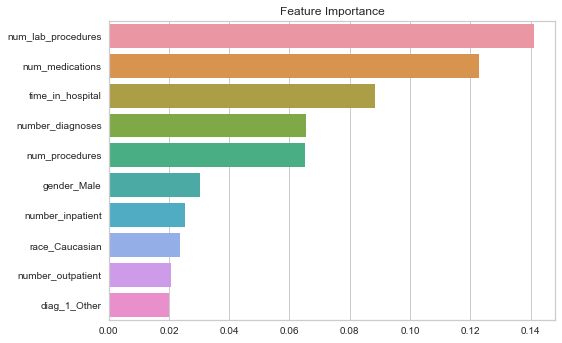

Top 10 Feature Importance for RandomForestClassifier

num_lab_procedures   0.14
num_medications      0.12
time_in_hospital     0.09
number_diagnoses     0.07
num_procedures       0.07
gender_Male          0.03
number_inpatient     0.03
race_Caucasian       0.02
number_outpatient    0.02
diag_1_Other         0.02
dtype: float64


In [21]:
plot_feature_importances(rfc)

### 6-Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

Average Balanced Accuracy (CV=10), Test Set: 0.5287427171825667
Average Balanced Accuracy (CV=10), Training Set:  0.5447967329320661
              precision    recall  f1-score   support

           0       0.63      0.88      0.73       761
           1       0.52      0.21      0.30       489

    accuracy                           0.61      1250
   macro avg       0.58      0.54      0.51      1250
weighted avg       0.59      0.61      0.56      1250



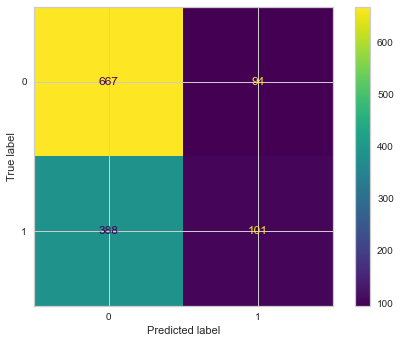

In [23]:
gbc = GradientBoostingClassifier(random_state=42)
plot_result(gbc, "gbc")

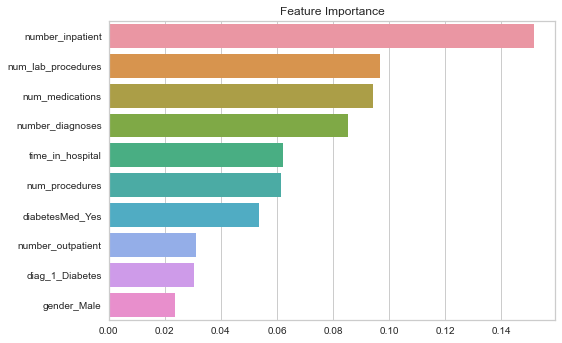

Top 10 Feature Importance for GradientBoostingClassifier

number_inpatient     0.15
num_lab_procedures   0.10
num_medications      0.09
number_diagnoses     0.09
time_in_hospital     0.06
num_procedures       0.06
diabetesMed_Yes      0.05
number_outpatient    0.03
diag_1_Diabetes      0.03
gender_Male          0.02
dtype: float64


In [24]:
plot_feature_importances(gbc)

### 7-Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

Average Balanced Accuracy (CV=10), Test Set: 0.5106203007518797
Average Balanced Accuracy (CV=10), Training Set:  0.5208036439940639
              precision    recall  f1-score   support

           0       0.67      0.04      0.08       761
           1       0.39      0.97      0.56       489

    accuracy                           0.40      1250
   macro avg       0.53      0.50      0.32      1250
weighted avg       0.56      0.40      0.27      1250



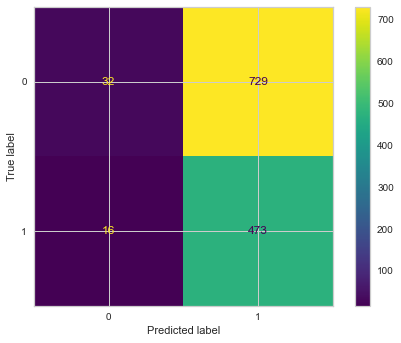

In [26]:
nb = GaussianNB()
plot_result(nb, "nb")

### 8-kNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

Average Balanced Accuracy (CV=10), Test Set: 0.5210325936594733
Average Balanced Accuracy (CV=10), Training Set:  0.5139358353668806
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       761
           1       0.38      0.27      0.32       489

    accuracy                           0.54      1250
   macro avg       0.49      0.49      0.48      1250
weighted avg       0.51      0.54      0.52      1250



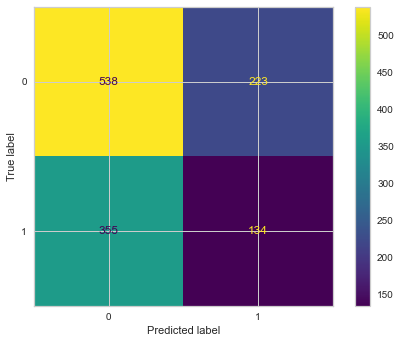

In [28]:
knn = KNeighborsClassifier()
plot_result(knn, "knn")

### 9-XGBOOST

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

Average Balanced Accuracy (CV=10), Test Set: 0.5381308384597858
Average Balanced Accuracy (CV=10), Training Set:  0.5342552639257155
              precision    recall  f1-score   support

           0       0.63      0.73      0.67       761
           1       0.44      0.33      0.37       489

    accuracy                           0.57      1250
   macro avg       0.53      0.53      0.52      1250
weighted avg       0.55      0.57      0.56      1250



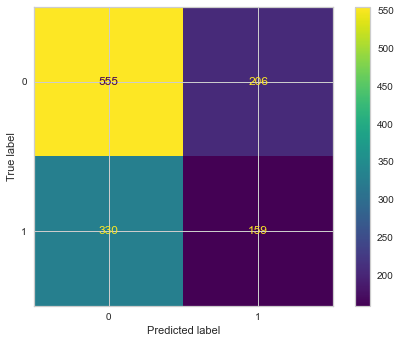

In [30]:
xgb = XGBClassifier(eval_metric = "logloss")
plot_result(xgb, "xgb")

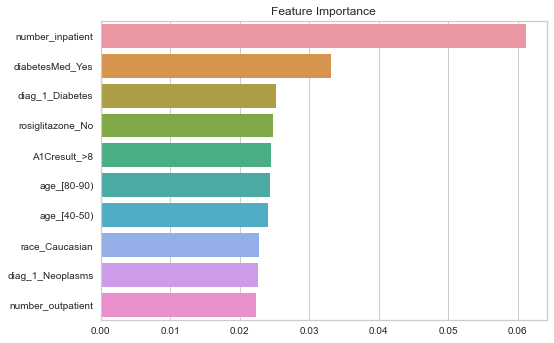

Top 10 Feature Importance for XGBClassifier

number_inpatient    0.06
diabetesMed_Yes     0.03
diag_1_Diabetes     0.03
rosiglitazone_No    0.02
A1Cresult_>8        0.02
age_[80-90)         0.02
age_[40-50)         0.02
race_Caucasian      0.02
diag_1_Neoplasms    0.02
number_outpatient   0.02
dtype: float32


In [31]:
plot_feature_importances(xgb)

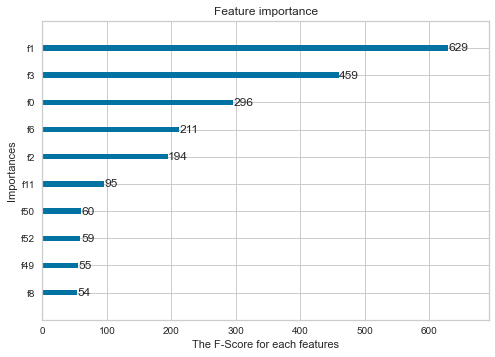

In [32]:
from xgboost import plot_importance
plot_importance(xgb,max_num_features=10)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

### Evaluation (iteration 1)

In [33]:

def AUC(cv_AUC, X_test=X_test):
    dtc_auc= roc_auc_score(y_test,dtc.predict(X_test)) #Decision Tree Classifier
    lr_auc= roc_auc_score(y_test, lr.decision_function(X_test))#logistic regression
    svc_auc= roc_auc_score(y_test, svc.decision_function(X_test))#Support Vector Classifier
    nc_auc= roc_auc_score(y_test, nc.predict(X_test))#Nearest Centroid Classifier
    rfc_auc= roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])#Randomforest Classifier
    gbc_auc= roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1])#GradientBoosting Classifier
    nb_auc= roc_auc_score(y_test, nb.predict_proba(X_test)[:,1])#Naive Bayes Classifier
    knn_auc= roc_auc_score(y_test, knn.predict(X_test))#KNeighbors Classifier
    xgb_auc= roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])#XGBoost Classifier

    cv_AUC={'dtc': dtc_auc,
           'lr': lr_auc,
           'svc':svc_auc,
           'nc':nc_auc,
           'rfc':rfc_auc,
           'gbc':gbc_auc,
           'nb':nb_auc,
           'knn':knn_auc,
           'xgb':xgb_auc}
    return cv_AUC

In [34]:
cv_AUC = AUC(cv_AUC)
df_eval = pd.DataFrame(data={'model': list(cv_acc_test.keys()), 
                             'bal_acc_train':list(cv_acc_train.values()),
                             'bal_acc_test': list(cv_acc_test.values()), 
                             'recall': list(cv_TPR.values()), 
                             'fallout':list(cv_FPR.values()),
                              'AUC': list(cv_AUC.values())}).round(2)
df_eval

,model,bal_acc_train,bal_acc_test,recall,fallout,AUC
0,dtc,52.71,51.81,43.15,36.79,0.53
1,lr,54.40,53.78,19.22,13.67,0.59
2,svc,53.84,50.76,15.95,9.72,0.54
3,nc,56.79,54.27,58.28,45.07,0.57
4,rfc,53.38,50.81,25.77,17.21,0.58
5,gbc,54.48,52.87,20.65,12.35,0.59
6,nb,52.08,51.06,96.73,95.80,0.57
7,knn,51.39,52.10,27.40,29.30,0.49
8,xgb,53.43,53.81,32.52,27.07,0.55


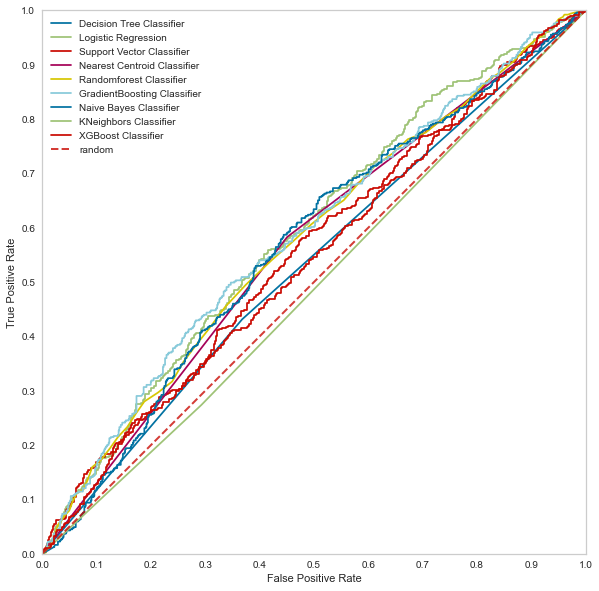

In [35]:
def plot_ROC(X_test=X_test, y_test=y_test):
    fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test,dtc.predict(X_test)) #Decision Tree Classifier
    fpr_lr, tpr_lr, thresholds = roc_curve(y_test, lr.decision_function(X_test))#logistic regression
    fpr_svc, tpr_svc, thresholds = roc_curve(y_test, svc.decision_function(X_test))#Support Vector Classifier
    fpr_nc, tpr_nc, thresholds = roc_curve(y_test, nc.predict(X_test))#Nearest Centroid Classifier
    fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])#Randomforest Classifier
    fpr_gbc, tpr_gbc, thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])#GradientBoosting Classifier
    fpr_nb, tpr_nb, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])#Naive Bayes Classifier
    fpr_knn, tpr_knn, thresholds = roc_curve(y_test, knn.predict(X_test))#KNeighbors Classifier
    fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])#XGBoost Classifier

    #compare the ROC curve between different models
    plt.figure(figsize=(10,10))
    plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree Classifier')
    plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
    plt.plot(fpr_svc, tpr_svc, label='Support Vector Classifier')
    plt.plot(fpr_nc, tpr_nc, label='Nearest Centroid Classifier')
    plt.plot(fpr_rfc, tpr_rfc, label='Randomforest Classifier')
    plt.plot(fpr_gbc, tpr_gbc, label='GradientBoosting Classifier')
    plt.plot(fpr_nb, tpr_nb, label='Naive Bayes Classifier')
    plt.plot(fpr_knn, tpr_knn, label='KNeighbors Classifier')
    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost Classifier')

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='random', alpha=.8)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xticks(np.arange(0,1.1,0.1))
    plt.yticks(np.arange(0,1.1,0.1))
    plt.grid()
    plt.legend()
    plt.axes().set_aspect('equal')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_ROC()

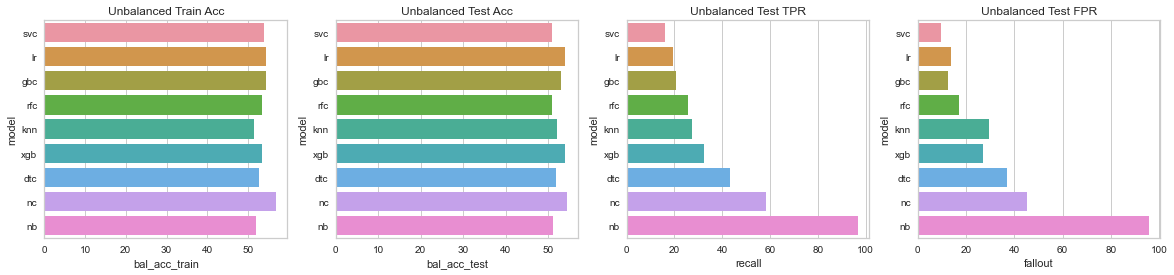

In [36]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.barplot(x="bal_acc_train", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0])
ax[0].set_title("Unbalanced Train Acc")
sns.barplot(x="bal_acc_test", y="model", data=df_eval.sort_values(by="recall"), ax=ax[1])
ax[1].set_title("Unbalanced Test Acc")
sns.barplot(x="recall", y="model", data=df_eval.sort_values(by="recall"), ax=ax[2])
ax[2].set_title("Unbalanced Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval.sort_values(by="recall"), ax=ax[3])
ax[3].set_title("Unbalanced Test FPR")
plt.show()

> NaiveBayes gave high BalanceAccuracy and TPR_Score (Recall), but it gave the poor FPR_Score (Fallout) in this unbalanced data set.

### Iteration 2: (Oversampling with SMOTE)

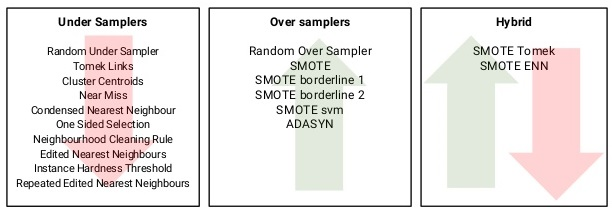

### Balancing data

In [37]:
y_test.value_counts(normalize=True)

0   0.61
1   0.39
Name: readmitted_YES, dtype: float64

In [38]:
y_train.value_counts(normalize=True)

0   0.61
1   0.39
Name: readmitted_YES, dtype: float64

In [39]:
# pip install imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [40]:
oversmote = SMOTE()
X_train_os, y_train_os= oversmote.fit_resample(X_train, y_train)

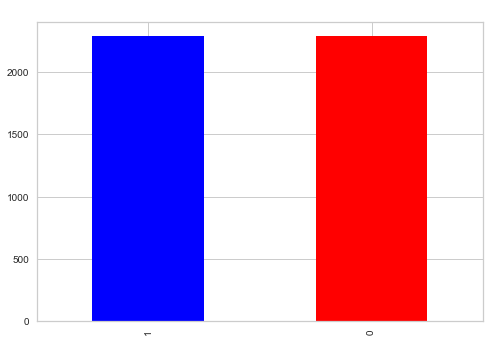

In [41]:
ax = y_train_os.value_counts().plot.bar(color=["blue", "red"])
def labels(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x() + 0.15, p.get_height()+200),size=8)
labels(ax)
plt.show()

In [42]:
X_train_os.shape

(4568, 54)

### Use algorithms

In [43]:
cv_acc_balance_train = {}
cv_acc_balance_test = {}
cv_TPR_balance = {}
cv_FPR_balance = {}
cv_AUC_balance = {}

In [44]:
def plot_result_smote(model, name:str):
    model.fit(X_train_os, y_train_os)
    y_pred = model.predict(X_test)

    # Evaluation based on a 10-fold cross-validation
    scoring = ['balanced_accuracy', 'recall_macro']
    scores_train = cross_val_score(model, X_train, y_train, cv=10, scoring = 'balanced_accuracy')
    scores_test = cross_val_score(model, X_test, y_test, cv=10, scoring = 'balanced_accuracy')
    cv_acc_balance_train[name] = round(scores_train.mean(), 4)*100  # balanced accuracy
    cv_acc_balance_test[name] = round(scores_test.mean(), 4)*100  # balanced accuracy
    cv_TPR_balance[name] = (confusion_matrix(y_test, y_pred)[1][1]/confusion_matrix(y_test, y_pred)[1].sum())*100  # recall (max)
    cv_FPR_balance[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())*100  # fallout (min)
    
    # accuracy scores
    print('Average Balanced Accuracy (CV=10), Test Set:', scores_test.mean())  
    print('Average Balanced Accuracy (CV=10), Training Set: ', scores_train.mean())

    # print classification report
    print(classification_report(y_test, y_pred, zero_division=0))

    # Plot Confusion Matrix
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

Average Balanced Accuracy (CV=10), Test Set: 0.5139311346548189
Average Balanced Accuracy (CV=10), Training Set:  0.5163321875347835
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       761
           1       0.41      0.44      0.43       489

    accuracy                           0.54      1250
   macro avg       0.52      0.52      0.52      1250
weighted avg       0.54      0.54      0.54      1250



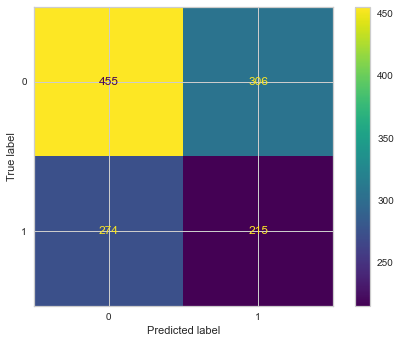

In [45]:
# Decision tree
dtc = DecisionTreeClassifier()

plot_result_smote(dtc, "dtc")

Average Balanced Accuracy (CV=10), Test Set: 0.5377652735735443
Average Balanced Accuracy (CV=10), Training Set:  0.5440190402107012
              precision    recall  f1-score   support

           0       0.67      0.56      0.61       761
           1       0.45      0.57      0.51       489

    accuracy                           0.56      1250
   macro avg       0.56      0.56      0.56      1250
weighted avg       0.59      0.56      0.57      1250



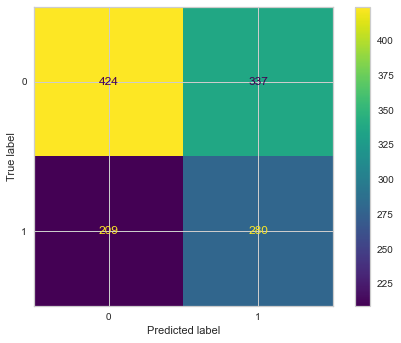

In [46]:
# Logistic Regression
lr = LogisticRegression()
plot_result_smote(lr, "lr")

Average Balanced Accuracy (CV=10), Test Set: 0.5427094522019335
Average Balanced Accuracy (CV=10), Training Set:  0.5678586972391713
              precision    recall  f1-score   support

           0       0.67      0.54      0.60       761
           1       0.45      0.59      0.51       489

    accuracy                           0.56      1250
   macro avg       0.56      0.57      0.56      1250
weighted avg       0.59      0.56      0.57      1250



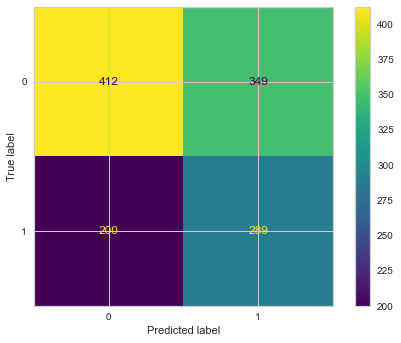

In [47]:
# NearestCentroid
nc = NearestCentroid()
plot_result_smote(nc, "nc")

Average Balanced Accuracy (CV=10), Test Set: 0.5076189865898513
Average Balanced Accuracy (CV=10), Training Set:  0.5384200511983347
              precision    recall  f1-score   support

           0       0.65      0.58      0.61       761
           1       0.44      0.51      0.47       489

    accuracy                           0.55      1250
   macro avg       0.54      0.54      0.54      1250
weighted avg       0.57      0.55      0.56      1250



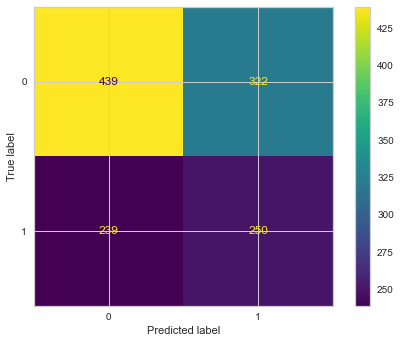

In [48]:
# SVC
svc = SVC()
plot_result_smote(svc, "svc")

Average Balanced Accuracy (CV=10), Test Set: 0.526665385053543
Average Balanced Accuracy (CV=10), Training Set:  0.5381265439275643
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       761
           1       0.50      0.36      0.42       489

    accuracy                           0.61      1250
   macro avg       0.58      0.57      0.56      1250
weighted avg       0.59      0.61      0.59      1250



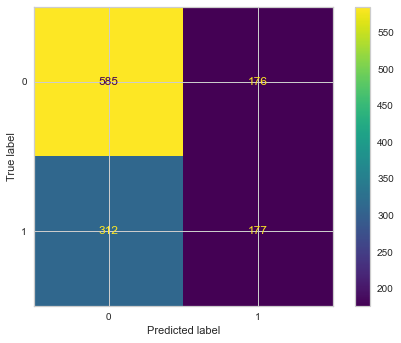

In [49]:
# Random Forest
rfc = RandomForestClassifier()
plot_result_smote(rfc, "rfc")

Average Balanced Accuracy (CV=10), Test Set: 0.5287427171825667
Average Balanced Accuracy (CV=10), Training Set:  0.5447967329320661
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       761
           1       0.52      0.35      0.42       489

    accuracy                           0.62      1250
   macro avg       0.59      0.57      0.57      1250
weighted avg       0.60      0.62      0.60      1250



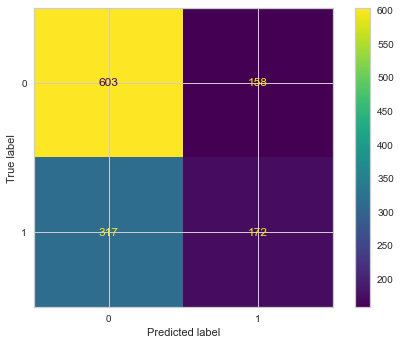

In [50]:
# Gradient Boost
gbc = GradientBoostingClassifier(random_state=42)
plot_result_smote(gbc, "gbc")

Average Balanced Accuracy (CV=10), Test Set: 0.5106203007518797
Average Balanced Accuracy (CV=10), Training Set:  0.5208036439940639
              precision    recall  f1-score   support

           0       0.68      0.05      0.10       761
           1       0.39      0.96      0.56       489

    accuracy                           0.41      1250
   macro avg       0.54      0.51      0.33      1250
weighted avg       0.57      0.41      0.28      1250



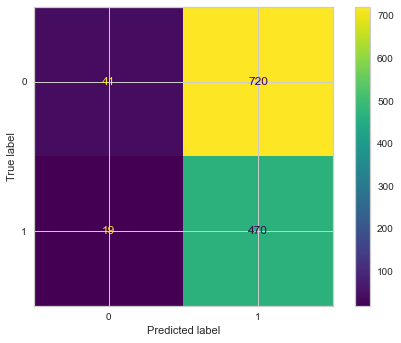

In [51]:
# Naive Bayes
nb = GaussianNB()
plot_result_smote(nb, "nb")

Average Balanced Accuracy (CV=10), Test Set: 0.5210325936594733
Average Balanced Accuracy (CV=10), Training Set:  0.5139358353668806
              precision    recall  f1-score   support

           0       0.62      0.49      0.54       761
           1       0.40      0.53      0.45       489

    accuracy                           0.50      1250
   macro avg       0.51      0.51      0.50      1250
weighted avg       0.53      0.50      0.51      1250



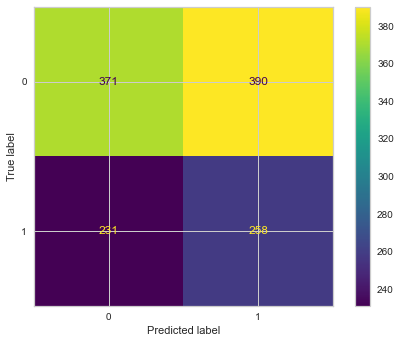

In [52]:
# kNN
knn = KNeighborsClassifier()
plot_result_smote(knn, "knn")

Average Balanced Accuracy (CV=10), Test Set: 0.5381308384597858
Average Balanced Accuracy (CV=10), Training Set:  0.5342552639257155
              precision    recall  f1-score   support

           0       0.63      0.70      0.66       761
           1       0.43      0.36      0.39       489

    accuracy                           0.56      1250
   macro avg       0.53      0.53      0.53      1250
weighted avg       0.55      0.56      0.56      1250



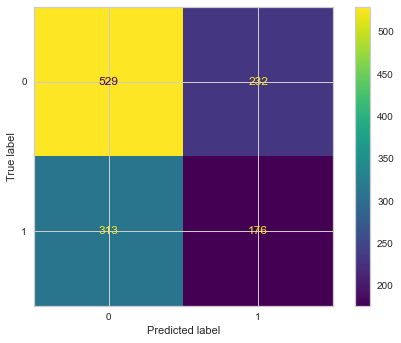

In [53]:
# XGBOOST
xgb = XGBClassifier(eval_metric = "logloss", random_state=42)
plot_result_smote(xgb, "xgb")

In [54]:
cv_AUC_balance = AUC(cv_AUC_balance)

In [55]:
df_eval_smote = pd.DataFrame(data={'model': list(cv_acc_balance_test.keys()), 
                                   'bal_acc_train':list(cv_acc_balance_train.values()),
                                   'bal_acc_test': list(cv_acc_balance_test.values()),
                                   'recall': list(cv_TPR_balance.values()), 
                                   'fallout':list(cv_FPR_balance.values()),
                                   'AUC': list(cv_AUC_balance.values())}).round(2)
df_eval_smote

,model,bal_acc_train,bal_acc_test,recall,fallout,AUC
0,dtc,51.63,51.39,43.97,40.21,0.52
1,lr,54.40,53.78,57.26,44.28,0.59
2,nc,56.79,54.27,59.10,45.86,0.57
3,svc,53.84,50.76,51.12,42.31,0.57
4,rfc,53.81,52.67,36.20,23.13,0.58
5,gbc,54.48,52.87,35.17,20.76,0.59
6,nb,52.08,51.06,96.11,94.61,0.58
7,knn,51.39,52.10,52.76,51.25,0.51
8,xgb,53.43,53.81,35.99,30.49,0.54


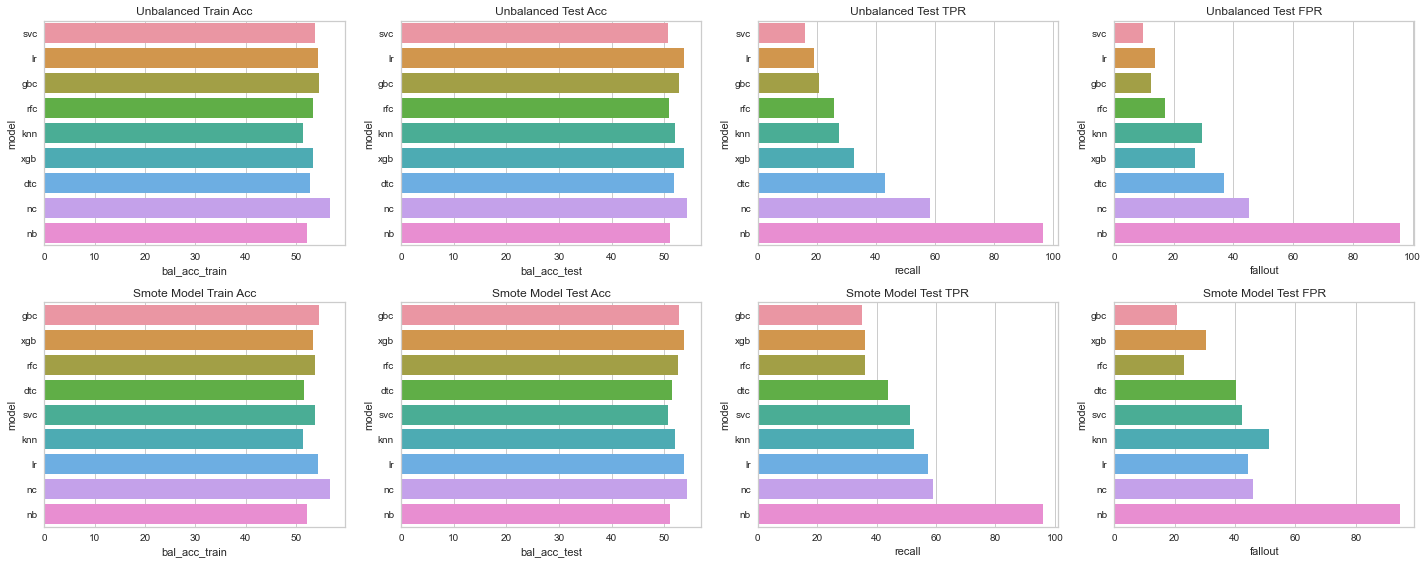

In [56]:
fig, ax = plt.subplots(2,4, figsize=(20, 8))

sns.barplot(x="bal_acc_train", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,0])
ax[0,0].set_title("Unbalanced Train Acc")
sns.barplot(x="bal_acc_test", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,1])
ax[0,1].set_title("Unbalanced Test Acc")
sns.barplot(x="recall", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,2])
ax[0,2].set_title("Unbalanced Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,3])
ax[0,3].set_title("Unbalanced Test FPR")

sns.barplot(x="bal_acc_train", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,0])
ax[1,0].set_title("Smote Model Train Acc")
sns.barplot(x="bal_acc_test", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,1])
ax[1,1].set_title("Smote Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,2])
ax[1,2].set_title("Smote Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,3])
ax[1,3].set_title("Smote Model Test FPR")

plt.tight_layout()
plt.show()

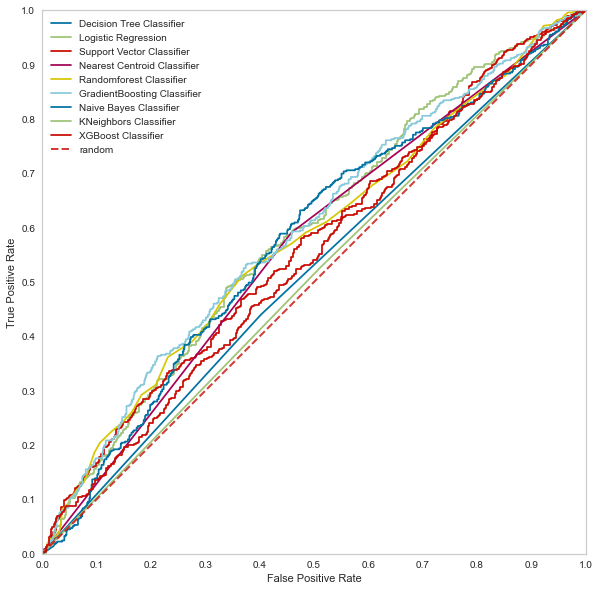

In [57]:
plot_ROC()

GradientBoosting yielded the optimized result as better FPR and relative mean strong recall scores. The balance accuracy is also relatively good.

## Iteration 3: (with RUS and Feature Selection)

In [58]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, NearMiss

In [59]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = under_sampler.fit_sample(X_train, y_train)

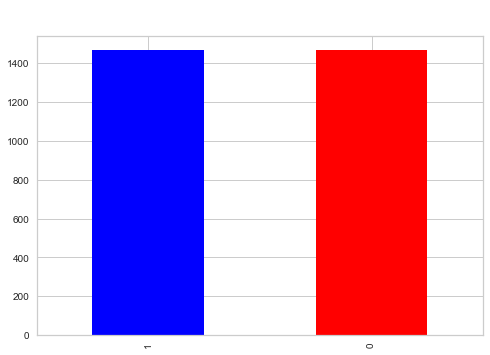

In [60]:
ax = y_train_rus.value_counts().plot.bar(color=["blue", "red"])
labels(ax)
plt.show()

#### Use Algorithm

In [61]:
cv_acc_rus_train = {}
cv_acc_rus_test = {}
cv_TPR_rus = {}
cv_FPR_rus = {}
cv_AUC_rus = {}

In [62]:
def plot_result_rus(model, name:str):
    model.fit(X_train_rus, y_train_rus)
    y_pred = model.predict(X_test)

    # Evaluation based on a 10-fold cross-validation
    scoring = ['balanced_accuracy', 'recall_macro']
    scores_train = cross_val_score(model, X_train, y_train, cv=10, scoring = 'balanced_accuracy')
    scores_test = cross_val_score(model, X_test, y_test, cv=10, scoring = 'balanced_accuracy')
    cv_acc_rus_train[name] = round(scores_train.mean(), 4)*100  # balanced accuracy
    cv_acc_rus_test[name] = round(scores_test.mean(), 4)*100  # balanced accuracy
    cv_TPR_rus[name] = (confusion_matrix(y_test, y_pred)[1][1]/confusion_matrix(y_test, y_pred)[1].sum())*100  # recall (max)
    cv_FPR_rus[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())*100  # fallout (min)
    
    # accuracy scores
    print('Average Balanced Accuracy (CV=10), Test Set:', scores_test.mean())  
    print('Average Balanced Accuracy (CV=10), Training Set: ', scores_train.mean())

    # print classification report
    print(classification_report(y_test, y_pred, zero_division=0))

    # Plot Confusion Matrix
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

Average Balanced Accuracy (CV=10), Test Set: 0.5169550296195033
Average Balanced Accuracy (CV=10), Training Set:  0.5276335351770414
              precision    recall  f1-score   support

           0       0.64      0.49      0.55       761
           1       0.42      0.57      0.48       489

    accuracy                           0.52      1250
   macro avg       0.53      0.53      0.52      1250
weighted avg       0.55      0.52      0.53      1250



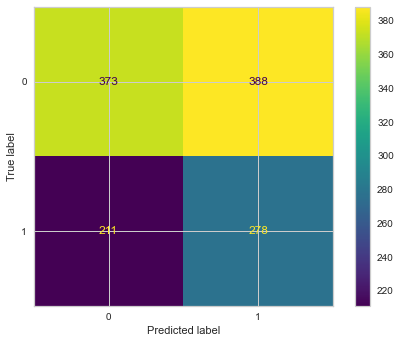

In [63]:
# Decision tree
dtc = DecisionTreeClassifier()

plot_result_rus(dtc, "dtc")

Average Balanced Accuracy (CV=10), Test Set: 0.5377652735735443
Average Balanced Accuracy (CV=10), Training Set:  0.5440190402107012
              precision    recall  f1-score   support

           0       0.67      0.55      0.61       761
           1       0.45      0.58      0.51       489

    accuracy                           0.56      1250
   macro avg       0.56      0.57      0.56      1250
weighted avg       0.59      0.56      0.57      1250



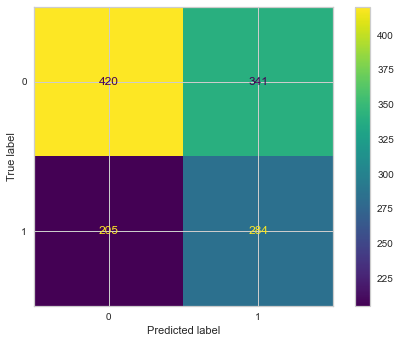

In [64]:
# Logistic Regression
lr = LogisticRegression()
plot_result_rus(lr, "lr")

Average Balanced Accuracy (CV=10), Test Set: 0.5427094522019335
Average Balanced Accuracy (CV=10), Training Set:  0.5678586972391713
              precision    recall  f1-score   support

           0       0.68      0.55      0.61       761
           1       0.46      0.59      0.52       489

    accuracy                           0.57      1250
   macro avg       0.57      0.57      0.56      1250
weighted avg       0.59      0.57      0.57      1250



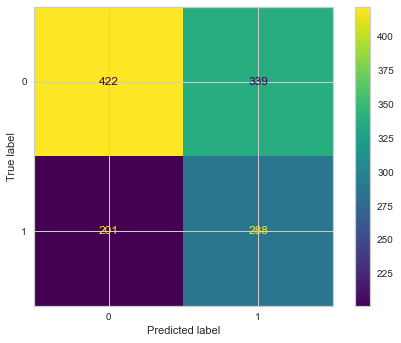

In [65]:
# NearestCentroid
nc = NearestCentroid()
plot_result_rus(nc, "nc")

Average Balanced Accuracy (CV=10), Test Set: 0.5076189865898513
Average Balanced Accuracy (CV=10), Training Set:  0.5384200511983347
              precision    recall  f1-score   support

           0       0.66      0.52      0.58       761
           1       0.43      0.58      0.50       489

    accuracy                           0.54      1250
   macro avg       0.55      0.55      0.54      1250
weighted avg       0.57      0.54      0.55      1250



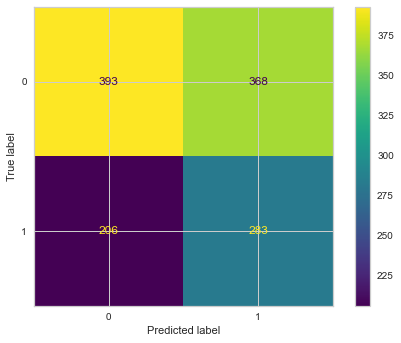

In [66]:
SVC
svc = SVC()
plot_result_rus(svc, "svc")

Average Balanced Accuracy (CV=10), Test Set: 0.5188320842691143
Average Balanced Accuracy (CV=10), Training Set:  0.5402449061407053
              precision    recall  f1-score   support

           0       0.65      0.53      0.58       761
           1       0.43      0.56      0.49       489

    accuracy                           0.54      1250
   macro avg       0.54      0.54      0.53      1250
weighted avg       0.56      0.54      0.54      1250



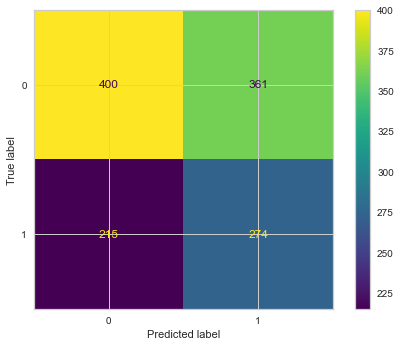

In [67]:
# Random Forest
rfc = RandomForestClassifier()
plot_result_rus(rfc, "rfc")

Average Balanced Accuracy (CV=10), Test Set: 0.5287427171825667
Average Balanced Accuracy (CV=10), Training Set:  0.5447967329320661
              precision    recall  f1-score   support

           0       0.67      0.55      0.60       761
           1       0.45      0.58      0.51       489

    accuracy                           0.56      1250
   macro avg       0.56      0.56      0.55      1250
weighted avg       0.58      0.56      0.56      1250



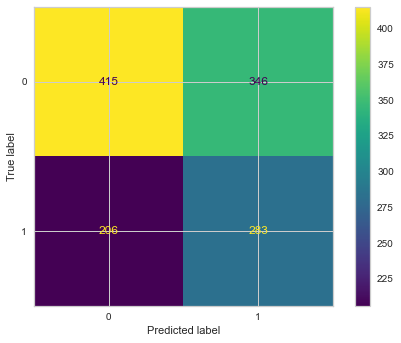

In [68]:
# Gradient Boost
gbc = GradientBoostingClassifier(random_state=42)
plot_result_rus(gbc, "gbc")

Average Balanced Accuracy (CV=10), Test Set: 0.5106203007518797
Average Balanced Accuracy (CV=10), Training Set:  0.5208036439940639
              precision    recall  f1-score   support

           0       0.67      0.25      0.36       761
           1       0.41      0.81      0.54       489

    accuracy                           0.47      1250
   macro avg       0.54      0.53      0.45      1250
weighted avg       0.57      0.47      0.43      1250



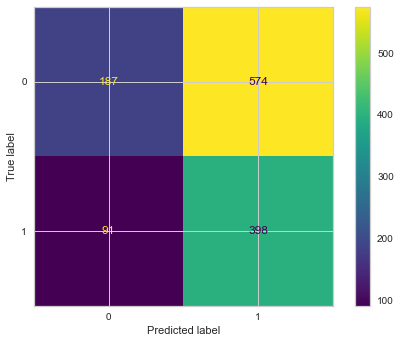

In [69]:
# Naive Bayes
nb = GaussianNB()
plot_result_rus(nb, "nb")

Average Balanced Accuracy (CV=10), Test Set: 0.5210325936594733
Average Balanced Accuracy (CV=10), Training Set:  0.5139358353668806
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       761
           1       0.40      0.48      0.44       489

    accuracy                           0.51      1250
   macro avg       0.51      0.51      0.50      1250
weighted avg       0.53      0.51      0.52      1250



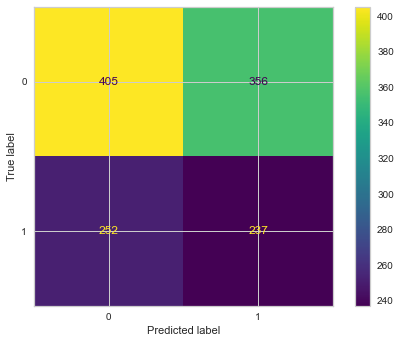

In [70]:
# kNN
knn = KNeighborsClassifier()
plot_result_rus(knn, "knn")

Average Balanced Accuracy (CV=10), Test Set: 0.5381308384597858
Average Balanced Accuracy (CV=10), Training Set:  0.5342552639257155
              precision    recall  f1-score   support

           0       0.64      0.51      0.57       761
           1       0.42      0.56      0.48       489

    accuracy                           0.53      1250
   macro avg       0.53      0.54      0.53      1250
weighted avg       0.56      0.53      0.54      1250



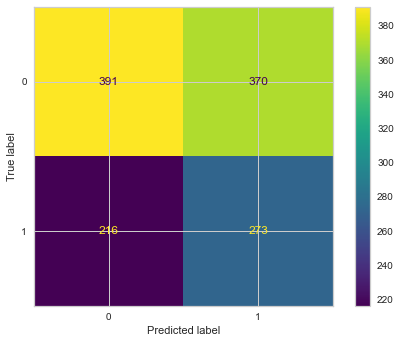

In [71]:
# XGBOOST
xgb = XGBClassifier(eval_metric = "logloss",random_state=42)
plot_result_rus(xgb, "xgb");

In [72]:
cv_AUC_rus = AUC(cv_AUC_rus)

In [73]:
df_eval_rus = pd.DataFrame(data={'model': list(cv_acc_rus_train.keys()), 
                             'bal_acc_train':list(cv_acc_rus_train.values()),
                             'bal_acc_test': list(cv_acc_rus_test.values()), 
                             'recall': list(cv_TPR_rus.values()), 
                             'fallout':list(cv_FPR_rus.values()),
                             'AUC': list(cv_AUC_rus.values())}).round(2)    
df_eval_rus

,model,bal_acc_train,bal_acc_test,recall,fallout,AUC
0,dtc,52.76,51.70,56.85,50.99,0.53
1,lr,54.40,53.78,58.08,44.81,0.59
2,nc,56.79,54.27,58.90,44.55,0.57
3,svc,53.84,50.76,57.87,48.36,0.57
4,rfc,54.02,51.88,56.03,47.44,0.56
5,gbc,54.48,52.87,57.87,45.47,0.59
6,nb,52.08,51.06,81.39,75.43,0.57
7,knn,51.39,52.10,48.47,46.78,0.51
8,xgb,53.43,53.81,55.83,48.62,0.55


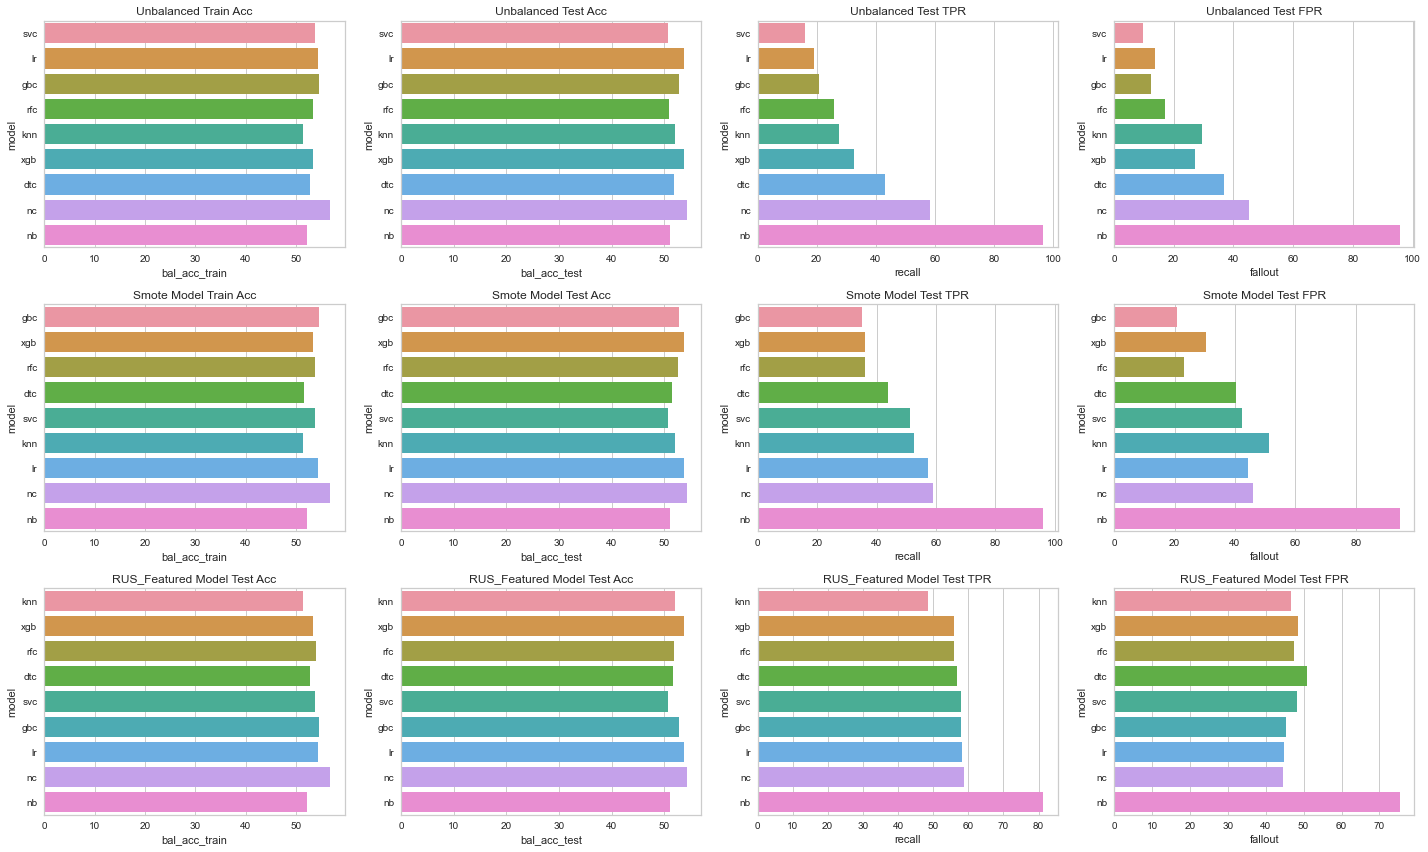

In [74]:
fig, ax = plt.subplots(3,4, figsize=(20, 12))

sns.barplot(x="bal_acc_train", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,0])
ax[0,0].set_title("Unbalanced Train Acc")
sns.barplot(x="bal_acc_test", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,1])
ax[0,1].set_title("Unbalanced Test Acc")
sns.barplot(x="recall", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,2])
ax[0,2].set_title("Unbalanced Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,3])
ax[0,3].set_title("Unbalanced Test FPR")

sns.barplot(x="bal_acc_train", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,0])
ax[1,0].set_title("Smote Model Train Acc")
sns.barplot(x="bal_acc_test", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,1])
ax[1,1].set_title("Smote Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,2])
ax[1,2].set_title("Smote Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,3])
ax[1,3].set_title("Smote Model Test FPR")

sns.barplot(x="bal_acc_train", y="model", data=df_eval_rus.sort_values(by="recall"), ax=ax[2,0])
ax[2,0].set_title("RUS_Featured Model Test Acc")
sns.barplot(x="bal_acc_test", y="model", data=df_eval_rus.sort_values(by="recall"), ax=ax[2,1])
ax[2,1].set_title("RUS_Featured Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_rus.sort_values(by="recall"), ax=ax[2,2])
ax[2,2].set_title("RUS_Featured Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_rus.sort_values(by="recall"), ax=ax[2,3])
ax[2,3].set_title("RUS_Featured Model Test FPR")

plt.tight_layout()
plt.show()

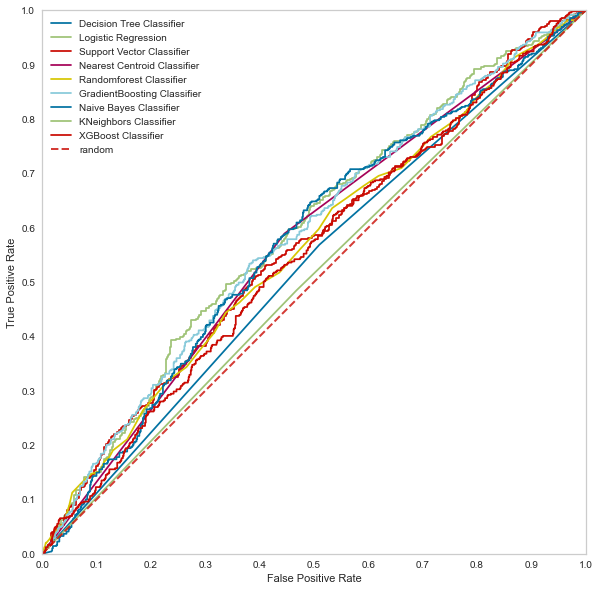

In [75]:
plot_ROC()

According to Smote and Feature Selection with Pearson Correlation, nb gave the better result for recall and fallout.

## Iteration 4: (with SMOTE and PCA)

In [76]:
from sklearn.decomposition import PCA

In [77]:
pca = PCA().fit(X_train_os)

we know that the principal components explain a part of the variance. From the Scikit-learn implementation, we can get the information about the explained variance and plot the cumulative variance. The PCA algorithm is going to standardize the input data frame, calculate the covariance matrix of the features. Thanks to [Mikulski](https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/)

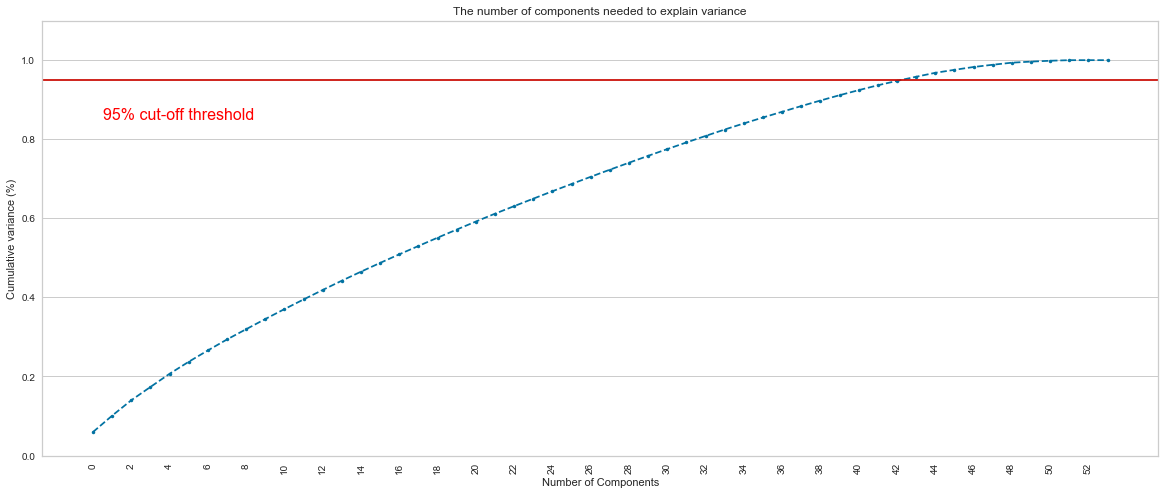

In [78]:
fig, ax = plt.subplots(figsize=(20,8))
xi = np.arange(0, 54, step=1)
y = np.cumsum(pca.explained_variance_ratio_[0:160:1])

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='.', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 54, step=2), rotation=90) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

It looks like n_components = 40 is suitable for% 95 total explained variance,

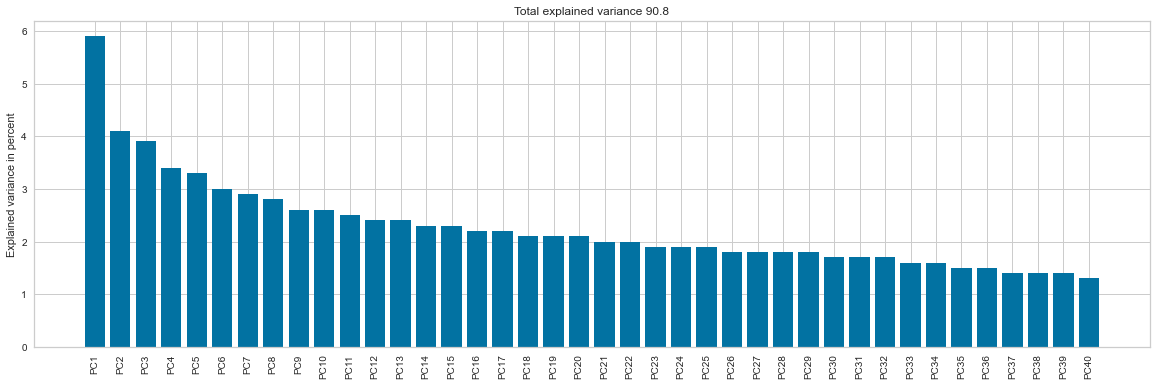

In [79]:
pca = PCA(n_components=40)
pca.fit(X_train_os)
per_var = np.round(pca.explained_variance_ratio_ * 100, 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.figure(figsize=(20,6))
plt.bar(x=range(len(per_var)), height=per_var, tick_label=labels)
plt.title('Total explained variance {}'.format(np.round(sum(per_var),2)))
plt.ylabel('Explained variance in percent')
plt.xticks(rotation=90)
plt.show()

In [80]:
X_train_os_pca = pca.transform(X_train_os)
pd.DataFrame(X_train_os_pca)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.22,-0.44,0.39,0.72,-2.13,-0.47,-0.30,0.52,-0.66,-0.69,...,-0.14,0.72,0.50,-0.28,1.29,1.45,0.16,-0.33,0.18,-1.41
1,1.25,3.67,-1.32,0.78,-1.08,0.25,-1.25,-0.61,0.03,-0.40,...,2.25,-2.62,1.39,-3.32,0.32,1.65,1.67,2.31,-1.26,-0.09
2,-2.50,0.62,-0.83,-0.44,0.24,0.10,0.04,-0.05,1.36,0.11,...,0.28,0.47,0.45,0.23,0.49,0.00,0.24,-0.62,0.19,1.11
3,-4.22,1.38,4.30,2.82,3.82,-1.73,-1.13,-0.21,0.09,0.77,...,-0.13,-0.17,-0.64,-0.05,-0.21,-0.37,-0.07,-0.37,-0.24,0.97
4,0.49,-0.58,-0.30,0.71,-1.60,-1.33,-0.26,0.13,-0.48,-0.64,...,-0.59,-0.10,0.42,0.08,0.25,-0.01,0.46,-0.01,0.00,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,0.93,-2.40,-0.54,0.91,-0.31,-1.91,-0.27,0.39,1.32,-0.60,...,0.17,0.09,-0.49,-0.18,-0.34,0.10,-0.53,-0.37,-0.17,-0.83
4564,2.14,-3.45,-0.71,-3.54,4.61,1.85,-4.48,-1.16,0.65,-3.29,...,-1.10,-0.96,0.47,0.31,-1.16,0.88,-0.83,0.26,-0.09,2.04
4565,-0.69,-1.18,-0.08,-0.72,-0.52,-0.83,-0.64,0.35,-1.51,0.18,...,0.12,0.08,-0.72,-0.93,-0.40,-1.33,-0.53,-0.53,-0.14,-0.14
4566,-0.62,0.13,0.15,-1.09,-0.20,-1.64,3.33,1.44,1.04,-2.52,...,-1.24,1.78,-1.94,-2.07,-0.07,1.59,-0.30,0.43,-0.30,0.11


The loads (loading scores) indicate "how high a variable X loads on a factor Y". 

(The i-th principal components can be selected via i in pca.components_ [0].)

In [81]:
# Top 20 columns that have the greatest impact
loading_scores = pd.Series(pca.components_[0], index=X.columns)
loading_scores.abs().sort_values(ascending=False)[:20]

change_No            0.43
diabetesMed_Yes      0.42
insulin_No           0.40
num_medications      0.23
A1Cresult_None       0.22
A1Cresult_>8         0.22
insulin_Up           0.22
insulin_Steady       0.21
metformin_No         0.20
time_in_hospital     0.17
num_lab_procedures   0.16
diag_1_Diabetes      0.14
glipizide_No         0.12
rosiglitazone_No     0.11
glyburide_No         0.11
max_glu_serum_Norm   0.10
metformin_Up         0.10
pioglitazone_No      0.09
glipizide_Up         0.09
glyburide_Up         0.09
dtype: float64

#### Use Algorithm

In [82]:
X_test_pca = pca.transform(X_test)

In [83]:
cv_acc_balance_train_pca = {}
cv_acc_balance_test_pca = {}
cv_TPR_balance_pca = {}
cv_FPR_balance_pca = {}
cv_AUC_balance_pca = {}

In [84]:
def plot_result_smoted_pca(model, name:str):
    model.fit(X_train_os_pca, y_train_os)
    y_pred = model.predict(X_test_pca)

    # Evaluation based on a 10-fold cross-validation
    scoring = ['balanced_accuracy', 'recall_macro']
    scores_train = cross_val_score(model, X_train_os_pca, y_train_os, cv=10, scoring = 'balanced_accuracy')
    scores_test = cross_val_score(model, X_test_pca, y_test, cv=10, scoring = 'balanced_accuracy')
    cv_acc_balance_train_pca[name] = round(scores_train.mean(), 4)*100  # balanced accuracy
    cv_acc_balance_test_pca[name] = round(scores_test.mean(), 4)*100  # balanced accuracy
    cv_TPR_balance_pca[name] = (confusion_matrix(y_test, y_pred)[1][1]/confusion_matrix(y_test, y_pred)[1].sum())*100  # recall (max)
    cv_FPR_balance_pca[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())*100  # fallout (min)

    # accuracy scores
    print('Average Balanced Accuracy (CV=10), Test Set:', scores_test.mean())  
    print('Average Balanced Accuracy (CV=10), Training Set: ', scores_train.mean())

    # print classification report
    print(classification_report(y_test, y_pred, zero_division=0))

    # Plot confusion matrix
    plt.figure(figsize=(3,3))
    plot_confusion_matrix(model, X_test_pca, y_test)
    plt.show()

Average Balanced Accuracy (CV=10), Test Set: 0.5215517486899066
Average Balanced Accuracy (CV=10), Training Set:  0.618699724201333
              precision    recall  f1-score   support

           0       0.60      0.53      0.56       761
           1       0.38      0.45      0.41       489

    accuracy                           0.50      1250
   macro avg       0.49      0.49      0.49      1250
weighted avg       0.51      0.50      0.50      1250



<Figure size 216x216 with 0 Axes>

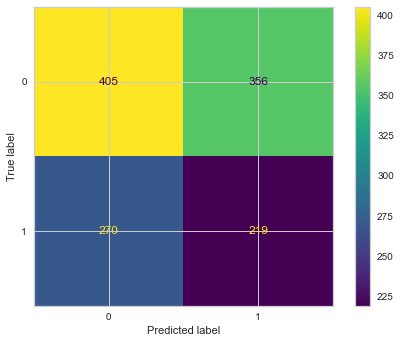

In [85]:
# Decision tree
dtc = DecisionTreeClassifier()
plot_result_smoted_pca(dtc, "dtc")

Average Balanced Accuracy (CV=10), Test Set: 0.5331924576050515
Average Balanced Accuracy (CV=10), Training Set:  0.5801587757603615
              precision    recall  f1-score   support

           0       0.67      0.57      0.62       761
           1       0.46      0.56      0.50       489

    accuracy                           0.57      1250
   macro avg       0.56      0.57      0.56      1250
weighted avg       0.59      0.57      0.57      1250



<Figure size 216x216 with 0 Axes>

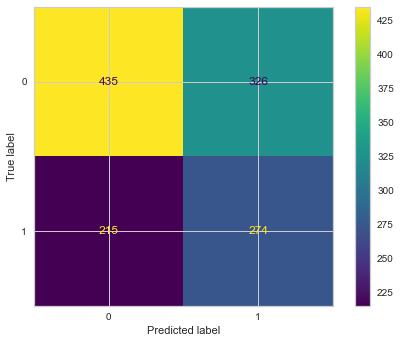

In [86]:
# Logistic Regression
lr = LogisticRegression()
plot_result_smoted_pca(lr, "lr")

Average Balanced Accuracy (CV=10), Test Set: 0.539137718484523
Average Balanced Accuracy (CV=10), Training Set:  0.5733576572435455
              precision    recall  f1-score   support

           0       0.67      0.56      0.61       761
           1       0.46      0.58      0.51       489

    accuracy                           0.57      1250
   macro avg       0.57      0.57      0.56      1250
weighted avg       0.59      0.57      0.57      1250



<Figure size 216x216 with 0 Axes>

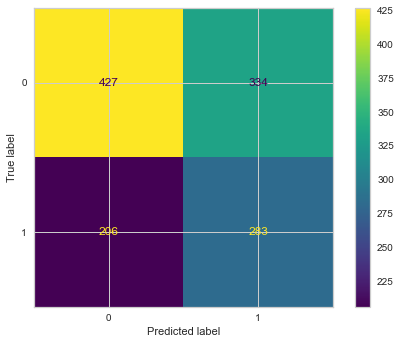

In [87]:
# NearestCentroid
nc = NearestCentroid()
plot_result_smoted_pca(nc, "nc")

Average Balanced Accuracy (CV=10), Test Set: 0.5104287707906129
Average Balanced Accuracy (CV=10), Training Set:  0.6196324599708879
              precision    recall  f1-score   support

           0       0.65      0.56      0.60       761
           1       0.44      0.53      0.48       489

    accuracy                           0.55      1250
   macro avg       0.54      0.55      0.54      1250
weighted avg       0.57      0.55      0.55      1250



<Figure size 216x216 with 0 Axes>

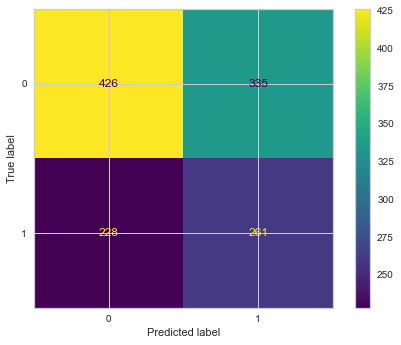

In [88]:
# SVC
svc = SVC()
plot_result_smoted_pca(svc, "svc")

Average Balanced Accuracy (CV=10), Test Set: 0.5110313323894151
Average Balanced Accuracy (CV=10), Training Set:  0.7004558339079139
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       761
           1       0.45      0.39      0.42       489

    accuracy                           0.57      1250
   macro avg       0.54      0.54      0.54      1250
weighted avg       0.56      0.57      0.57      1250



<Figure size 216x216 with 0 Axes>

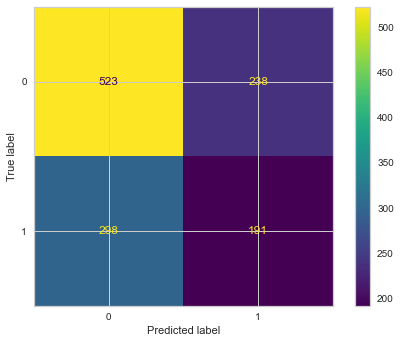

In [89]:
# Random Forest
rfc = RandomForestClassifier()
plot_result_smoted_pca(rfc, "rfc")

Average Balanced Accuracy (CV=10), Test Set: 0.5167679751326368
Average Balanced Accuracy (CV=10), Training Set:  0.6237751857810465
              precision    recall  f1-score   support

           0       0.63      0.55      0.59       761
           1       0.42      0.51      0.46       489

    accuracy                           0.53      1250
   macro avg       0.53      0.53      0.52      1250
weighted avg       0.55      0.53      0.54      1250



<Figure size 216x216 with 0 Axes>

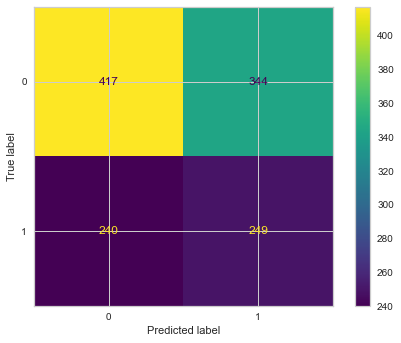

In [90]:
# Gradient Boost
gbc = GradientBoostingClassifier()
plot_result_smoted_pca(gbc, "gbc")

Average Balanced Accuracy (CV=10), Test Set: 0.5471735344855645
Average Balanced Accuracy (CV=10), Training Set:  0.5453506856661304
              precision    recall  f1-score   support

           0       0.66      0.31      0.42       761
           1       0.41      0.75      0.53       489

    accuracy                           0.48      1250
   macro avg       0.53      0.53      0.48      1250
weighted avg       0.56      0.48      0.46      1250



<Figure size 216x216 with 0 Axes>

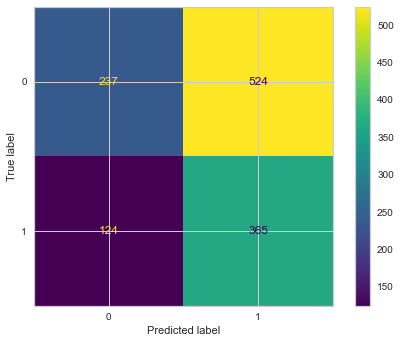

In [91]:
# Naive Bayes
nb = GaussianNB()
plot_result_smoted_pca(nb, "nb")

Average Balanced Accuracy (CV=10), Test Set: 0.5237984368388504
Average Balanced Accuracy (CV=10), Training Set:  0.608871523787635
              precision    recall  f1-score   support

           0       0.62      0.49      0.54       761
           1       0.40      0.53      0.46       489

    accuracy                           0.50      1250
   macro avg       0.51      0.51      0.50      1250
weighted avg       0.53      0.50      0.51      1250



<Figure size 216x216 with 0 Axes>

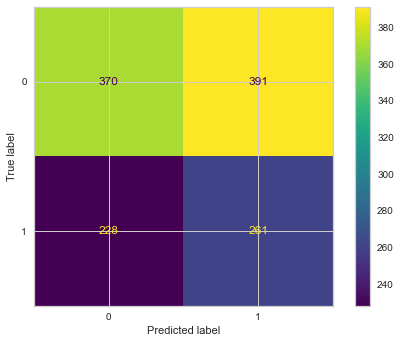

In [92]:
# kNN
knn = KNeighborsClassifier()
plot_result_smoted_pca(knn, "knn")

Average Balanced Accuracy (CV=10), Test Set: 0.5032653671516453
Average Balanced Accuracy (CV=10), Training Set:  0.6710947674864017
              precision    recall  f1-score   support

           0       0.63      0.62      0.63       761
           1       0.43      0.44      0.43       489

    accuracy                           0.55      1250
   macro avg       0.53      0.53      0.53      1250
weighted avg       0.55      0.55      0.55      1250



<Figure size 216x216 with 0 Axes>

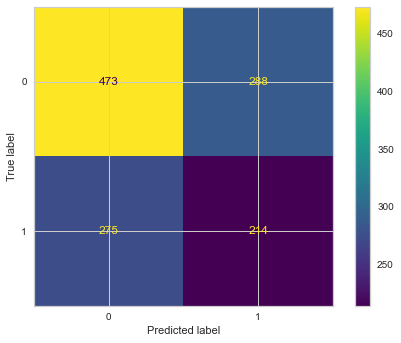

In [93]:
# XGBOOST
xgb = XGBClassifier(eval_metric = "logloss")
plot_result_smoted_pca(xgb, "xgb");

In [94]:
cv_AUC_balance_pca = AUC(cv_AUC_balance_pca, X_test_pca)
cv_AUC_balance_pca

{'dtc': 0.49002362084115997,
 'lr': 0.593635540363691,
 'svc': 0.5670264881264293,
 'nc': 0.569917958557382,
 'rfc': 0.5440841751113188,
 'gbc': 0.549677665540713,
 'nb': 0.5437576754297568,
 'knn': 0.5099723482985739,
 'xgb': 0.5340486766685746}

In [95]:
df_eval_smote_pca = pd.DataFrame(data={'model': list(cv_acc_balance_train_pca.keys()), 
                                       'bal_acc_train':list(cv_acc_balance_train_pca.values()),
                                       'bal_acc_test': list(cv_acc_balance_test_pca.values()),
                                       'recall': list(cv_TPR_balance_pca.values()), 
                                       'fallout':list(cv_FPR_balance_pca.values()),
                                       'AUC': list(cv_AUC_rus.values())}).round(2)
df_eval_smote_pca

,model,bal_acc_train,bal_acc_test,recall,fallout,AUC
0,dtc,61.87,52.16,44.79,46.78,0.53
1,lr,58.02,53.32,56.03,42.84,0.59
2,nc,57.34,53.91,57.87,43.89,0.57
3,svc,61.96,51.04,53.37,44.02,0.57
4,rfc,70.05,51.10,39.06,31.27,0.56
5,gbc,62.38,51.68,50.92,45.20,0.59
6,nb,54.54,54.72,74.64,68.86,0.57
7,knn,60.89,52.38,53.37,51.38,0.51
8,xgb,67.11,50.33,43.76,37.84,0.55


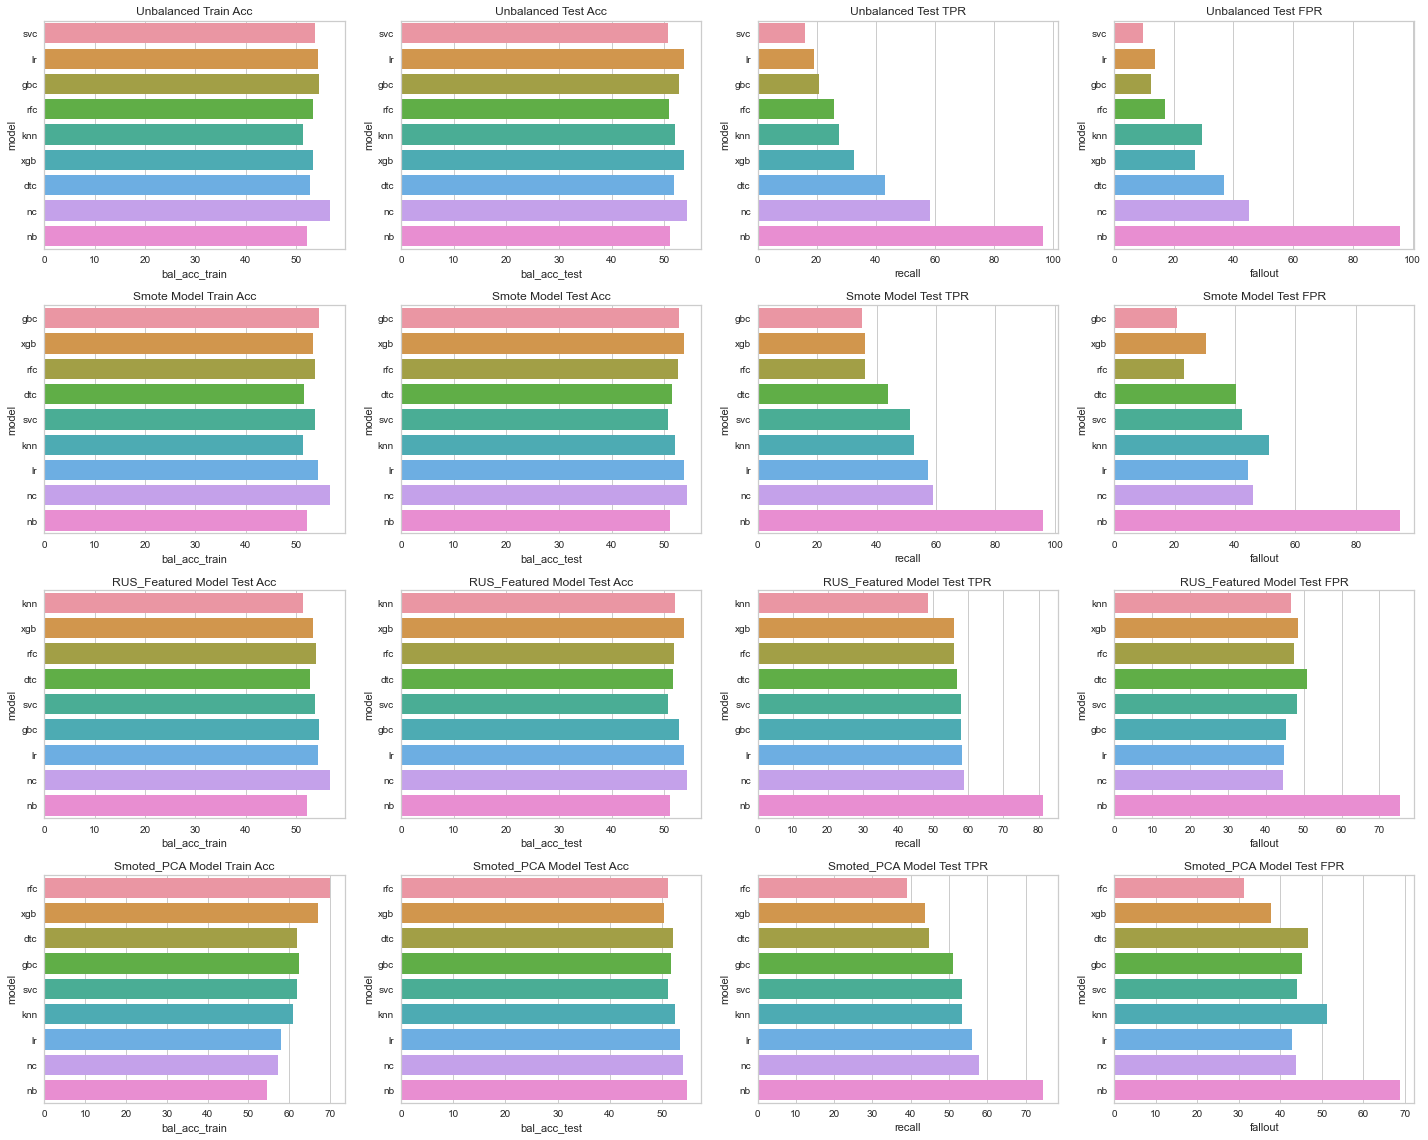

In [96]:
fig, ax = plt.subplots(4,4, figsize=(20, 16))

sns.barplot(x="bal_acc_train", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,0])
ax[0,0].set_title("Unbalanced Train Acc")
sns.barplot(x="bal_acc_test", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,1])
ax[0,1].set_title("Unbalanced Test Acc")
sns.barplot(x="recall", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,2])
ax[0,2].set_title("Unbalanced Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,3])
ax[0,3].set_title("Unbalanced Test FPR")

sns.barplot(x="bal_acc_train", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,0])
ax[1,0].set_title("Smote Model Train Acc")
sns.barplot(x="bal_acc_test", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,1])
ax[1,1].set_title("Smote Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,2])
ax[1,2].set_title("Smote Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,3])
ax[1,3].set_title("Smote Model Test FPR")

sns.barplot(x="bal_acc_train", y="model", data=df_eval_rus.sort_values(by="recall"), ax=ax[2,0])
ax[2,0].set_title("RUS_Featured Model Test Acc")
sns.barplot(x="bal_acc_test", y="model", data=df_eval_rus.sort_values(by="recall"), ax=ax[2,1])
ax[2,1].set_title("RUS_Featured Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_rus.sort_values(by="recall"), ax=ax[2,2])
ax[2,2].set_title("RUS_Featured Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_rus.sort_values(by="recall"), ax=ax[2,3])
ax[2,3].set_title("RUS_Featured Model Test FPR")

sns.barplot(x="bal_acc_train", y="model", data=df_eval_smote_pca.sort_values(by="recall"), ax=ax[3,0])
ax[3,0].set_title("Smoted_PCA Model Train Acc")
sns.barplot(x="bal_acc_test", y="model", data=df_eval_smote_pca.sort_values(by="recall"), ax=ax[3,1])
ax[3,1].set_title("Smoted_PCA Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_smote_pca.sort_values(by="recall"), ax=ax[3,2])
ax[3,2].set_title("Smoted_PCA Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_smote_pca.sort_values(by="recall"), ax=ax[3,3])
ax[3,3].set_title("Smoted_PCA Model Test FPR")

plt.tight_layout()
plt.show()

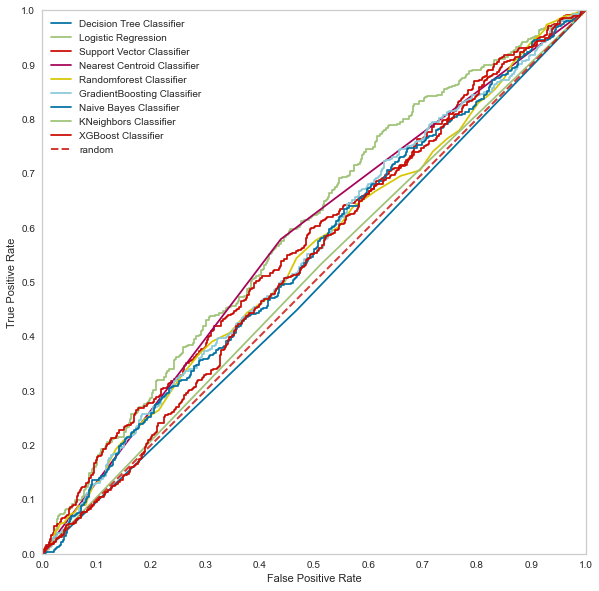

In [97]:
plot_ROC(X_test_pca)

According to Smote and PCA, none of the models really gave relatively good results.

In [98]:
df_eval["type"] = "Unbalanced"
df_eval_smote["type"] = "Smote"
df_eval_rus["type"] = "RUS"
df_eval_smote_pca["type"] = "Smote_PCA"

In [99]:
frames = [df_eval, df_eval_smote, df_eval_rus, df_eval_smote_pca]
df_result = pd.concat(frames, ignore_index=True)
df_result['model'] = df_result['model'].str.upper()
df_result[["recall", "fallout", "bal_acc_train", "bal_acc_test",'AUC']] = df_result[["recall", "fallout",  "bal_acc_train", "bal_acc_test",'AUC']].apply(lambda x: np.round(x, 2))

In [100]:
df_result

,model,bal_acc_train,bal_acc_test,recall,fallout,AUC,type
0,DTC,52.71,51.81,43.15,36.79,0.53,Unbalanced
1,LR,54.40,53.78,19.22,13.67,0.59,Unbalanced
2,SVC,53.84,50.76,15.95,9.72,0.54,Unbalanced
3,NC,56.79,54.27,58.28,45.07,0.57,Unbalanced
4,RFC,53.38,50.81,25.77,17.21,0.58,Unbalanced
5,GBC,54.48,52.87,20.65,12.35,0.59,Unbalanced
6,NB,52.08,51.06,96.73,95.80,0.57,Unbalanced
7,KNN,51.39,52.10,27.40,29.30,0.49,Unbalanced
8,XGB,53.43,53.81,32.52,27.07,0.55,Unbalanced
9,DTC,51.63,51.39,43.97,40.21,0.52,Smote


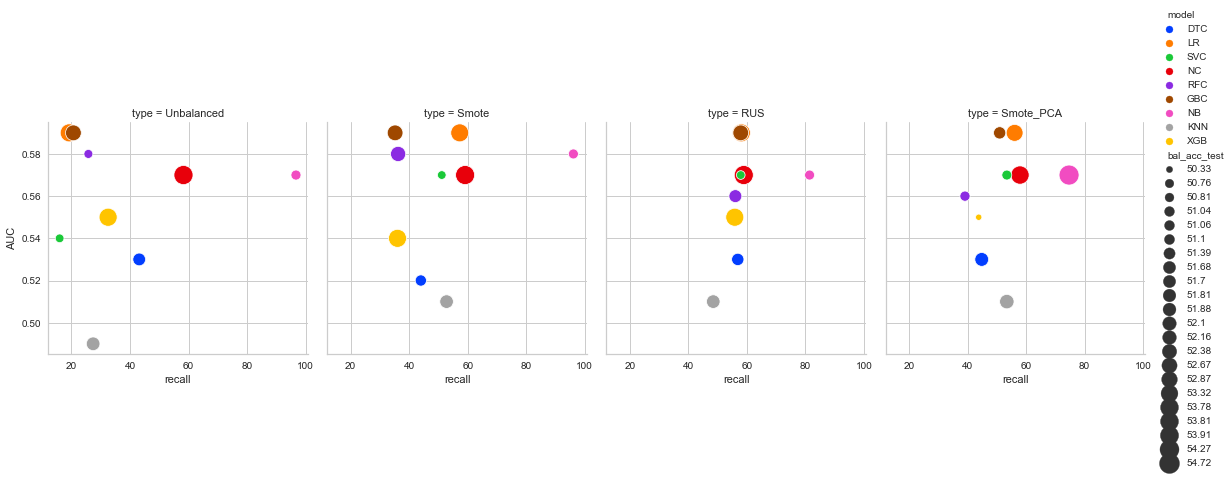

In [101]:
sns.relplot(x="recall", y="AUC", hue="model", size="bal_acc_test", 
            sizes=(40, 400), col="type", alpha=1, palette="bright", height=4, legend='full', data=df_result)

In this plot it looks like GradientBoosting in Smote has a better result

## Iteration 5: (with SMOTE and hyperparameter optimization)

Smote_PCA looks better than Smote. Hyperparameter is optimized by Smote_PCA.

#### GridSearch

In [102]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline

#### Use Algorithm

In [103]:
cv_acc_balance_train_tuned = {}
cv_acc_balance_test_tuned = {}
cv_TPR_balance_tuned = {}
cv_FPR_balance_tuned = {}
cv_AUC_balance_tuned = {}

In [104]:
def plot_result_smote_tuned(model, name:str):
    model.fit(X_train_os, y_train_os)
    y_pred = model.predict(X_test)

    # Evaluation based on a 10-fold cross-validation
    scores_train = cross_val_score(model, X_train_os, y_train_os, cv=10, scoring = 'balanced_accuracy')
    scores_test = cross_val_score(model, X_test, y_test, cv=10, scoring = 'balanced_accuracy')
    cv_acc_balance_train_tuned[name] = round(scores_train.mean(), 4)*100  # balanced accuracy
    cv_acc_balance_test_tuned[name] = round(scores_test.mean(), 4)*100  # balanced accuracy
    cv_TPR_balance_tuned[name] = (confusion_matrix(y_test, y_pred)[1][1]/confusion_matrix(y_test, y_pred)[1].sum())*100  # recall (max)
    cv_FPR_balance_tuned[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())*100  # fallout (min)
    
    # accuracy scores
    print('Average Balanced Accuracy (CV=10), Test Set:', scores_test.mean())  
    print('Average Balanced Accuracy (CV=10), Training Set: ', scores_train.mean())

    # print classification report
    print(classification_report(y_test, y_pred, zero_division=0))

    # Plot confusion matrix
    plt.figure(figsize=(3,3))
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20,
                       min_samples_split=4)
Average Balanced Accuracy (CV=10), Test Set: 0.5021663330403932
Average Balanced Accuracy (CV=10), Training Set:  0.5824389029341914
              precision    recall  f1-score   support

           0       0.66      0.59      0.62       761
           1       0.45      0.53      0.49       489

    accuracy                           0.56      1250
   macro avg       0.55      0.56      0.55      1250
weighted avg       0.58      0.56      0.57      1250



<Figure size 216x216 with 0 Axes>

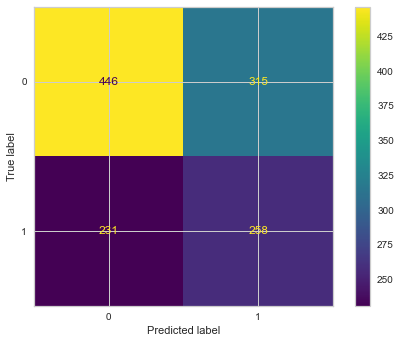

In [105]:
# Decision Tree
params = {'criterion' : ["gini", "entropy"],
          'max_depth':[2, 5, 10], 
          'min_samples_leaf':[20, 10, 1],
          'min_samples_split':[2, 4, 8]}

grid_searcher = GridSearchCV(DecisionTreeClassifier(), params)
grid_searcher.fit(X_train_os, y_train_os)
dtc = grid_searcher
print(grid_searcher.best_estimator_)
plot_result_smote_tuned(grid_searcher, "dtc")

LogisticRegression(C=0.3593813663804626, max_iter=200, solver='liblinear')
Average Balanced Accuracy (CV=10), Test Set: 0.5377652735735443
Average Balanced Accuracy (CV=10), Training Set:  0.5827989734160729
              precision    recall  f1-score   support

           0       0.67      0.56      0.61       761
           1       0.46      0.57      0.51       489

    accuracy                           0.57      1250
   macro avg       0.56      0.57      0.56      1250
weighted avg       0.59      0.57      0.57      1250



<Figure size 216x216 with 0 Axes>

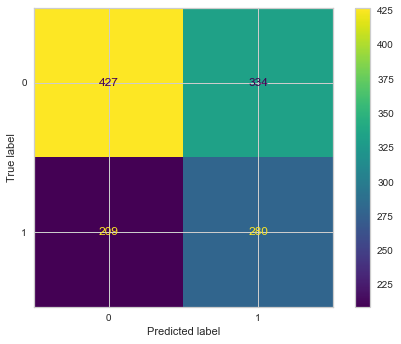

In [106]:
# Logistic Regression
params = {'penalty' : ['l1', 'l2'],
          'C' : np.logspace(-4, 4, 10),
          'max_iter':[200, 300],
          'solver' : ['liblinear']}

grid_searcher = GridSearchCV(LogisticRegression(), params)
grid_searcher.fit(X_train_os, y_train_os)
lr = grid_searcher
print(grid_searcher.best_estimator_)
plot_result_smote_tuned(grid_searcher.best_estimator_, "lr")

NearestCentroid(shrink_threshold=0.01)
Average Balanced Accuracy (CV=10), Test Set: 0.5433673469387756
Average Balanced Accuracy (CV=10), Training Set:  0.5786141116984602
              precision    recall  f1-score   support

           0       0.67      0.54      0.60       761
           1       0.45      0.59      0.51       489

    accuracy                           0.56      1250
   macro avg       0.56      0.57      0.56      1250
weighted avg       0.59      0.56      0.57      1250



<Figure size 216x216 with 0 Axes>

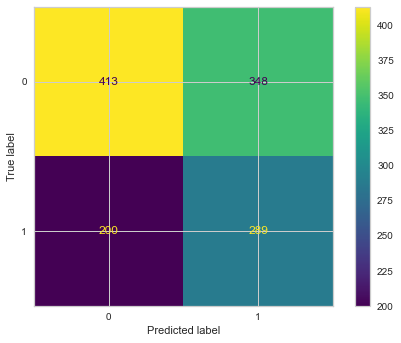

In [107]:
# NearestCentroid
params={'metric': ['euclidean', 'manhattan'],
        'shrink_threshold' : [0.01, 0.1, 0.5]}

grid_searcher = GridSearchCV(NearestCentroid(), params)
grid_searcher.fit(X_train_os, y_train_os)
nc = grid_searcher
print(grid_searcher.best_estimator_)
plot_result_smote_tuned(grid_searcher.best_estimator_, "nc")

SVC(C=10, gamma=0.1)
Average Balanced Accuracy (CV=10), Test Set: 0.526198409986004
Average Balanced Accuracy (CV=10), Training Set:  0.7188357082662991
              precision    recall  f1-score   support

           0       0.62      0.74      0.68       761
           1       0.43      0.30      0.36       489

    accuracy                           0.57      1250
   macro avg       0.53      0.52      0.52      1250
weighted avg       0.55      0.57      0.55      1250



<Figure size 216x216 with 0 Axes>

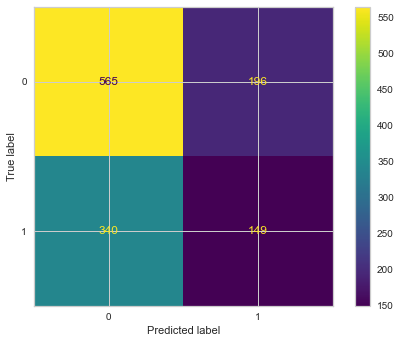

In [108]:
# SVC
params = {'kernel':(['linear','rbf']), 
          'C':[0.01,1,10], 
          'gamma':[0.01, 0.1, 1]}

grid_searcher = GridSearchCV(SVC(), params)
grid_searcher.fit(X_train_os, y_train_os)
svc = grid_searcher
print(grid_searcher.best_estimator_)
plot_result_smote_tuned(grid_searcher.best_estimator_, "svc")

RandomForestClassifier(criterion='entropy', max_features=5)
Average Balanced Accuracy (CV=10), Test Set: 0.5314148805455196
Average Balanced Accuracy (CV=10), Training Set:  0.6932984754462576
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       761
           1       0.51      0.33      0.40       489

    accuracy                           0.62      1250
   macro avg       0.58      0.56      0.56      1250
weighted avg       0.60      0.62      0.59      1250



<Figure size 216x216 with 0 Axes>

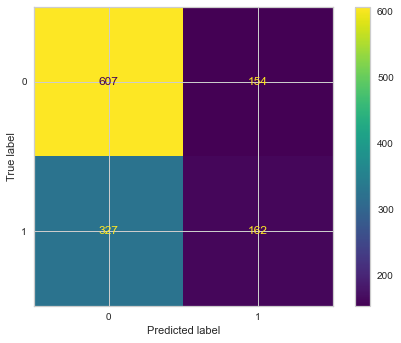

In [109]:
# Random Forest
params={'criterion': ['entropy', 'gini'],
        'n_estimators' : [10,50,100],
        'max_features' : [5,15,25]}

grid_searcher = GridSearchCV(RandomForestClassifier(), params)
grid_searcher.fit(X_train_os, y_train_os)
rfc = grid_searcher
print(grid_searcher.best_estimator_)
plot_result_smote_tuned(grid_searcher.best_estimator_, "rfc")

GradientBoostingClassifier(learning_rate=1, max_depth=5, min_samples_leaf=5,
                           min_samples_split=10, random_state=42)
Average Balanced Accuracy (CV=10), Test Set: 0.5243106752270286
Average Balanced Accuracy (CV=10), Training Set:  0.6462508618708342
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       761
           1       0.45      0.42      0.44       489

    accuracy                           0.57      1250
   macro avg       0.55      0.55      0.55      1250
weighted avg       0.57      0.57      0.57      1250



<Figure size 216x216 with 0 Axes>

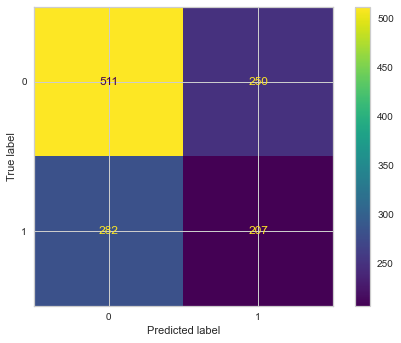

In [110]:
# Gradient Boosting Classifier

params={
       "learning_rate": [1],
      "min_samples_split": [50, 10, 2],
       "min_samples_leaf": [1, 5, 10],
       "max_depth":[3,4,5],
       "subsample":[0.5, 1.0],
       "n_estimators":[10, 50, 100],
       "random_state":[42]}

grid_searcher = RandomizedSearchCV(GradientBoostingClassifier(), params)
grid_searcher.fit(X_train_os, y_train_os)
gbc = grid_searcher
print(grid_searcher.best_estimator_)
plot_result_smote_tuned(gbc, "gbc")

Average Balanced Accuracy (CV=10), Test Set: 0.5106203007518797
Average Balanced Accuracy (CV=10), Training Set:  0.5208611047268826
              precision    recall  f1-score   support

           0       0.68      0.05      0.10       761
           1       0.39      0.96      0.56       489

    accuracy                           0.41      1250
   macro avg       0.54      0.51      0.33      1250
weighted avg       0.57      0.41      0.28      1250



<Figure size 216x216 with 0 Axes>

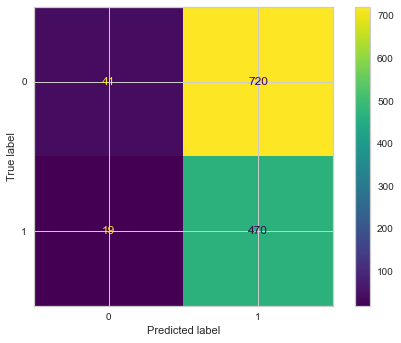

In [111]:
# Naive Bayes has no tuning
nb = GaussianNB()
plot_result_smote_tuned(nb, "nb")

KNeighborsClassifier(n_neighbors=2)
Average Balanced Accuracy (CV=10), Test Set: 0.5017398406731113
Average Balanced Accuracy (CV=10), Training Set:  0.6535786792308282
              precision    recall  f1-score   support

           0       0.62      0.74      0.68       761
           1       0.43      0.30      0.35       489

    accuracy                           0.57      1250
   macro avg       0.53      0.52      0.52      1250
weighted avg       0.55      0.57      0.55      1250



<Figure size 216x216 with 0 Axes>

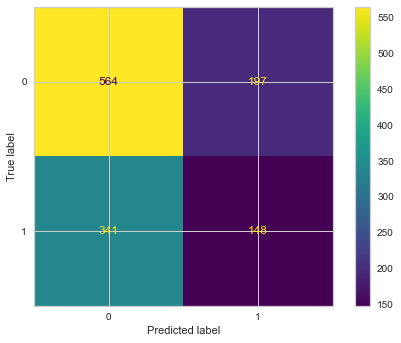

In [112]:
# kNN
params = {'n_neighbors':[2, 3, 5],
         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_searcher = GridSearchCV(KNeighborsClassifier(), params)
grid_searcher.fit(X_train_os, y_train_os)
knn = grid_searcher
print(grid_searcher.best_estimator_)
plot_result_smote_tuned(grid_searcher.best_estimator_, "knn")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)
Average Balanced Accuracy (CV=10), Test Set: 0.5221775013833284
Average Balanced Accuracy (CV=10), Training Set:  0.679745077759902
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       761
           1       0.48      0.36      0.41       489

    accuracy                           0.60      1250
   macro avg       0.57      0.56      0.55      1250
weighted avg      

<Figure size 216x216 with 0 Axes>

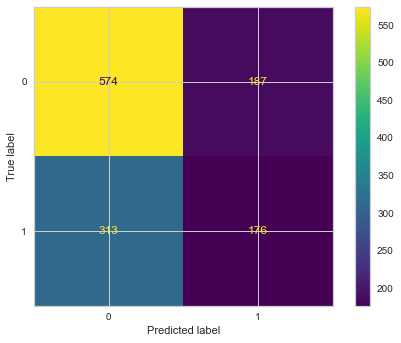

In [113]:
# XGBOOST
params = {"n_estimators": [100, 300],
          "subsample":[0.5,0.8,1],
          "max_depth":[15,25],
          "learning_rate":[0.01,0.1,0.3]}

grid_searcher = GridSearchCV(XGBClassifier(), params)
grid_searcher.fit(X_train_os, y_train_os)
xgb = grid_searcher
print(grid_searcher.best_estimator_)
plot_result_smote_tuned(grid_searcher.best_estimator_, "xgb")

# xgb = XGBClassifier(eval_metric = "logloss",n_estimators=25, learning_rate=0.01,  max_depth=3, random_state=42)
# plot_result_smote_tuned(xgb, "xgb");

In [114]:
cv_AUC_balance_tuned = AUC(cv_AUC_balance_tuned)

In [116]:
df_eval_smote_tuned = pd.DataFrame(data={'model': list(cv_acc_balance_train_tuned.keys()), 
                                               'bal_acc_train':list(cv_acc_balance_train_tuned.values()),
                                               'bal_acc_test': list(cv_acc_balance_test_tuned.values()),
                                               'recall': list(cv_TPR_balance_tuned.values()), 
                                               'fallout':list(cv_FPR_balance_tuned.values()),
                                                'AUC': list(cv_AUC_balance_tuned.values())}).round(2)
df_eval_smote_tuned

,model,bal_acc_train,bal_acc_test,recall,fallout,AUC
0,dtc,58.24,50.22,52.76,41.39,0.56
1,lr,58.28,53.78,57.26,43.89,0.59
2,nc,57.86,54.34,59.10,45.73,0.54
3,svc,71.88,52.62,30.47,25.76,0.57
4,rfc,69.33,53.14,33.13,20.24,0.59
5,gbc,64.63,52.43,42.33,32.85,0.57
6,nb,52.09,51.06,96.11,94.61,0.58
7,knn,65.36,50.17,30.27,25.89,0.52
8,xgb,67.97,52.22,35.99,24.57,0.58


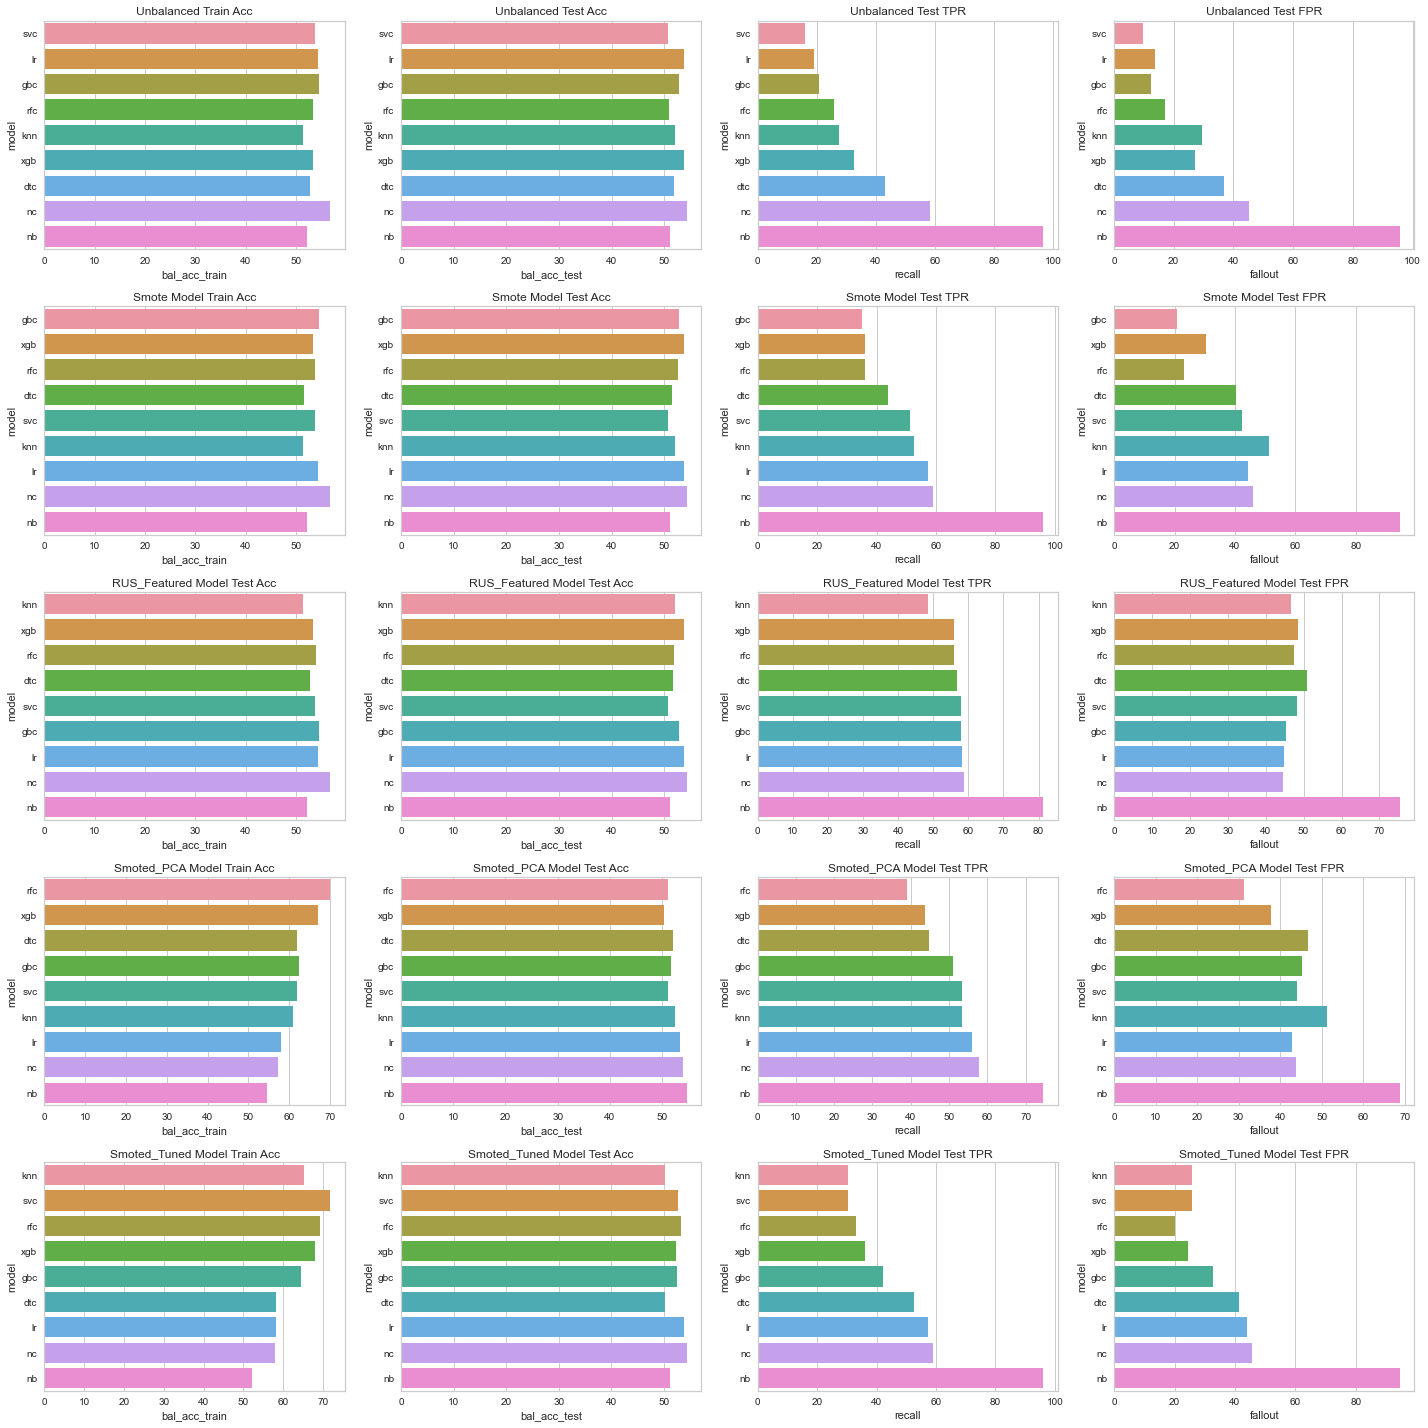

In [117]:
fig, ax = plt.subplots(5,4, figsize=(20, 20))

sns.barplot(x="bal_acc_train", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,0])
ax[0,0].set_title("Unbalanced Train Acc")
sns.barplot(x="bal_acc_test", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,1])
ax[0,1].set_title("Unbalanced Test Acc")
sns.barplot(x="recall", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,2])
ax[0,2].set_title("Unbalanced Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,3])
ax[0,3].set_title("Unbalanced Test FPR")

sns.barplot(x="bal_acc_train", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,0])
ax[1,0].set_title("Smote Model Train Acc")
sns.barplot(x="bal_acc_test", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,1])
ax[1,1].set_title("Smote Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,2])
ax[1,2].set_title("Smote Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,3])
ax[1,3].set_title("Smote Model Test FPR")

sns.barplot(x="bal_acc_train", y="model", data=df_eval_rus.sort_values(by="recall"), ax=ax[2,0])
ax[2,0].set_title("RUS_Featured Model Test Acc")
sns.barplot(x="bal_acc_test", y="model", data=df_eval_rus.sort_values(by="recall"), ax=ax[2,1])
ax[2,1].set_title("RUS_Featured Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_rus.sort_values(by="recall"), ax=ax[2,2])
ax[2,2].set_title("RUS_Featured Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_rus.sort_values(by="recall"), ax=ax[2,3])
ax[2,3].set_title("RUS_Featured Model Test FPR")

sns.barplot(x="bal_acc_train", y="model", data=df_eval_smote_pca.sort_values(by="recall"), ax=ax[3,0])
ax[3,0].set_title("Smoted_PCA Model Train Acc")
sns.barplot(x="bal_acc_test", y="model", data=df_eval_smote_pca.sort_values(by="recall"), ax=ax[3,1])
ax[3,1].set_title("Smoted_PCA Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_smote_pca.sort_values(by="recall"), ax=ax[3,2])
ax[3,2].set_title("Smoted_PCA Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_smote_pca.sort_values(by="recall"), ax=ax[3,3])
ax[3,3].set_title("Smoted_PCA Model Test FPR")

sns.barplot(x="bal_acc_train", y="model", data=df_eval_smote_tuned.sort_values(by="recall"), ax=ax[4,0])
ax[4,0].set_title("Smoted_Tuned Model Train Acc")
sns.barplot(x="bal_acc_test", y="model", data=df_eval_smote_tuned.sort_values(by="recall"), ax=ax[4,1])
ax[4,1].set_title("Smoted_Tuned Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_smote_tuned.sort_values(by="recall"), ax=ax[4,2])
ax[4,2].set_title("Smoted_Tuned Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_smote_tuned.sort_values(by="recall"), ax=ax[4,3])
ax[4,3].set_title("Smoted_Tuned Model Test FPR")

plt.tight_layout()
plt.show()

In [118]:
df_eval_smote_tuned["type"] = "Smote_Tuned"

In [119]:
frames = [df_eval, df_eval_smote, df_eval_rus, df_eval_smote_pca, df_eval_smote_tuned]
df_result = pd.concat(frames, ignore_index=True)
df_result['model'] = df_result['model'].str.upper()
df_result[["recall", "fallout", "bal_acc_train", "bal_acc_test",'AUC']] = df_result[["recall", "fallout",  "bal_acc_train", "bal_acc_test",'AUC']].apply(lambda x: np.round(x, 2))
df_result

,model,bal_acc_train,bal_acc_test,recall,fallout,AUC,type
0,DTC,52.71,51.81,43.15,36.79,0.53,Unbalanced
1,LR,54.40,53.78,19.22,13.67,0.59,Unbalanced
2,SVC,53.84,50.76,15.95,9.72,0.54,Unbalanced
3,NC,56.79,54.27,58.28,45.07,0.57,Unbalanced
4,RFC,53.38,50.81,25.77,17.21,0.58,Unbalanced
5,GBC,54.48,52.87,20.65,12.35,0.59,Unbalanced
6,NB,52.08,51.06,96.73,95.80,0.57,Unbalanced
7,KNN,51.39,52.10,27.40,29.30,0.49,Unbalanced
8,XGB,53.43,53.81,32.52,27.07,0.55,Unbalanced
9,DTC,51.63,51.39,43.97,40.21,0.52,Smote


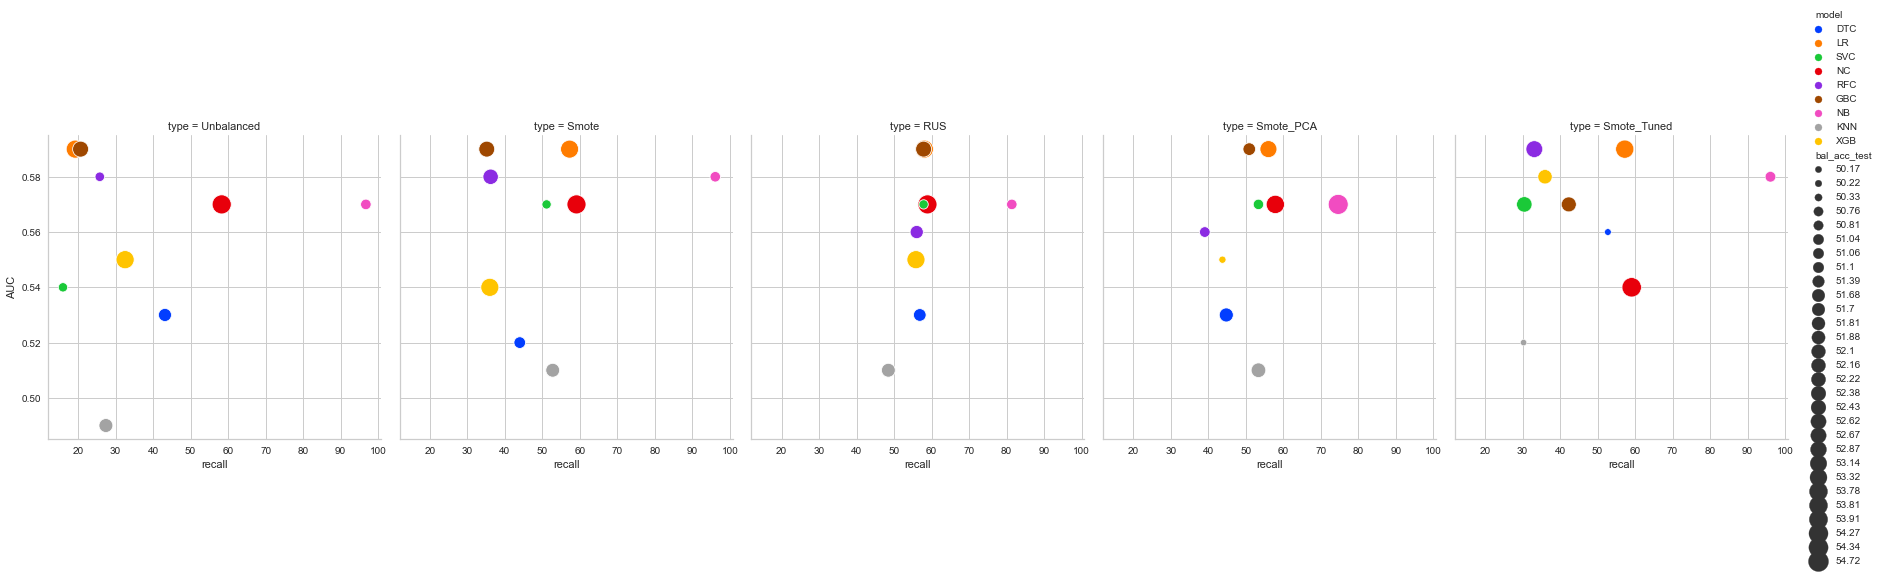

In [121]:
sns.relplot(x="recall", y="AUC", hue="model", size="bal_acc_test", 
            sizes=(40, 400), col="type", alpha=1, palette="bright", height=5, legend='full', data=df_result)

#  Summary: 
* In this project the diabetic_data.csv dataset was analyzed by machine learning methods with 5 iterations as a classification. For each iteration one tried little by little to achieve a better model result. 
* 9 different algorithms (DecisionTree, Logistic Regression, Support Vector Machine, Random Forest, Gradient Boost, NaiveBayes, Nearest Centroid, XGBOOST and kNearestNeigbour) were used. 
* After the data cleaning and EDA process, the data set was scaled with StandartScaler because there were many large and small features. After that, something special (oversampling, FeatureSelection, FeatureExtraction, HyperParameter optimization) was applied in each iteration. 
* In the end, GradientBoost with only oversampled and scaled data set gave better results.  The accuracy of all the models are similar and ranges between 62-64%. 
* Looking at the false positives and the recall value which is approx 60% in Random forest, it gives us better results than the rest. The above visual helps us in seeing the accuracy and the ROC curver further helps us decide the performance of different models.